## Evaluating scGWAS results when using Pathway Commons v12 vs Pathway Commons v14

In [ ]:
library(data.table)
#library(tidyverse)
#library("EnsDb.Hsapiens.v86")
#library(reshape2)
library(R.utils)
library(UpSetR)
library(grid)
library(cowplot)
library(ggnewscale)
library(GGally)

In [48]:
exp_mac <- c("M-0: MERTK+ SELENOP+ LYVE1+"="white",
                 "M-1: MERTK+ SELENOP+ LYVE1-"="white", 
                 "M-2: MERTK+ S100A8+"="white", 
                 "M-3: MERTK+ HBEGF+"="white", 
                 "M-4: SPP1+"="white", 
                 "M-5: C1QA+"="white",
                 "M-6: STAT1+ CXCL10+"="white", 
                 "M-7: IL1B+ FCN1+ HBEGF+"="white", 
                 "M-8: PLCG2+"="white", 
                 "M-9: DC3"="#5ab4ac", 
                 "M-10: DC2"="white", 
                 "M-11: CD16+/DC4"="#5ab4ac", 
                 "M-12: DC1"="white",
                 "M-13: pDC"="white", 
                 "M-14: LAMP3+"="white")
exp_fib <- c('F-0: PRG4+ CLIC5+ lining'='white',
                   'F-1: PRG4+ lining'='white', 
                   'F-2: CD34+ sublining'='white', 
                   'F-3: POSTN+ sublining'='white', 
                   'F-4: DKK3+ sublining'='white', 
                   'F-5: CD74-hi sublining'='white', 
                   'F-6: CXCL12+ SFRP1+ sublining'='white', 
                   'F-7: NOTCH3+ sublining'='white', 
                   'F-8: RSPO3+ intermediate'='white', 
                   'Mu-0: Mural'='white')

exp_b <- c("B-0: CD24+CD27+CD11b+\n switched memory" = "white", 
                   "B-1: CD24++CD27+IgM+\n unswitched memory" = "#5ab4ac", 
                   "B-2: IgM+IgD+TCL1A+ naive" = "#5ab4ac", 
                   "B-3: IgM+IgD+CD1c+ MZ-like" = "white",
                   "B-4: AICDA+BCL6+ GC-like" = "white",
                   "B-5: CD11c+LAMP1+ ABC" = "white",
                   "B-6: IgM+ plasma" = "white", 
                   "B-7: HLA-DR+IgG+ plasmablast" = "grey80",
                   "B-8: IgG1+IgG3+ plasma" = "white"
                   )

exp_t <- c("T-0: CD4+ IL7R+ memory" = "white", "T-1: CD4+ CD161+ memory" = "white", 
                 "T-2: CD4+ IL7R+CCR5+ memory" = "white", "T-3: CD4+ Tfh/Tph" = "white", 
                 "T-4: CD4+ naive" = "white", "T-5: CD4+ GZMK+ memory" = "white", 
                 "T-6: CD4+ memory" = "white", "T-7: CD4+ Tph" = "white", 
                 "T-8: CD4+ CD25-high Treg" = "white", "T-9: CD4+ CD25-low Treg" = "white", 
                 "T-10: CD4+ OX40+NR3C1+" = "white", "T-11: CD4+ CD146+ memory" = "white", 
                 "T-12: CD4+ GNLY+" = "white", "T-13: CD8+ GZMK/B+ memory" = "white", 
                 "T-14: CD8+ GZMK+ memory" = "white", "T-15: CD8+ GZMB+/TEMRA" = "white",
                 "T-16: CD8+ CD45ROlow/naive" = "white", "T-17: CD8+ activated/NK-like" = "white",
                 "T-18: Proliferating" = "white", "T-19: MT-high (low quality)" = "#5ab4ac", 
                 "T-20: CD38+" = "grey80", "T-21: Innate-like" = "white", 
                 "T-22: Vdelta1" = "#5ab4ac", "T-23: Vdelta2" = "#5ab4ac")

exp_nk <- c("NK-0: CD56dim CD16+ IFNG-" = "#5ab4ac", 
                    "NK-1: CD56dim CD16+ IFNG+CD160+" = "white", 
                    "NK-2: CD56dim CD16+ IFNG+CD160-" = "#01665e",
                    "NK-3: CD56dim CD16+ GZMB-" = "#5ab4ac", 
                    "NK-4: CD56bright CD16- GZMA+CD160+" = "#5ab4ac", 
                    "NK-5: CD56bright CD16- GZMA+CD69+" = "#01665e", 
                    "NK-6: CD56bright CD16- GNLY+" = "#5ab4ac", 
                    "NK-7: CD56bright CD16- GNLY+CD69+" = "white", 
                    "NK-8: CD56bright CD16- IFN response" = "white",
                    "NK-9: MT-high" = "grey", 
                    "NK-10: PCNA+ Proliferating" = "grey80",
                    "NK-11: MKI67+ Proliferating" = "#5ab4ac", 
                    "NK-12: IL7R+ ILC" = "#5ab4ac", 
                    "NK-13: IL7R+CD161+ ILC" = "#5ab4ac")

exp_end <- c("E-0: SPARC+ capillary" = "white", 
                     "E-1: LIFR+ venular" = "white",
                     "E-2: ICAM1+ venular" = "white", 
                     "E-3: NOTCH4+ arteriolar" = "white", 
                     "E-4: Lymphatic" = "#5ab4ac")

meta_colors <- c(exp_t, exp_nk, 
                 exp_mac, exp_b,
                exp_fib, exp_end)
meta_colors1 <- list(exp_end, exp_fib, 
                     exp_b, exp_mac,
                     exp_nk, exp_t)

In [122]:
exp_mac <- c("M-0: MERTK+ SELENOP+ LYVE1+"="#756bb1",
                 "M-1: MERTK+ SELENOP+ LYVE1-"="#756bb1", 
                 "M-2: MERTK+ S100A8+"="#756bb1", 
                 "M-3: MERTK+ HBEGF+"="#756bb1", 
                 "M-4: SPP1+"="#bcbddc", 
                 "M-5: C1QA+"="white",
                 "M-6: STAT1+ CXCL10+"="#756bb1", 
                 "M-7: IL1B+ FCN1+ HBEGF+"="#756bb1", 
                 "M-8: PLCG2+"="white", 
                 "M-9: DC3"="white", 
                 "M-10: DC2"="white", 
                 "M-11: CD16+/DC4"="white", 
                 "M-12: DC1"="white",
                 "M-13: pDC"="white", 
                 "M-14: LAMP3+"="white")
exp_fib <- c('F-0: PRG4+ CLIC5+ lining'='white',
                   'F-1: PRG4+ lining'='white', 
                   'F-2: CD34+ sublining'='#756bb1', 
                   'F-3: POSTN+ sublining'='white', 
                   'F-4: DKK3+ sublining'='white', 
                   'F-5: CD74-hi sublining'='white', 
                   'F-6: CXCL12+ SFRP1+ sublining'='white', 
                   'F-7: NOTCH3+ sublining'='#756bb1', 
                   'F-8: RSPO3+ intermediate'='white', 
                   'Mu-0: Mural'='white')

exp_b <- c("B-0: CD24+CD27+CD11b+\n switched memory" = "#756bb1", 
                   "B-1: CD24++CD27+IgM+\n unswitched memory" = "white", 
                   "B-2: IgM+IgD+TCL1A+ naive" = "white", 
                   "B-3: IgM+IgD+CD1c+ MZ-like" = "white",
                   "B-4: AICDA+BCL6+ GC-like" = "white",
                   "B-5: CD11c+LAMP1+ ABC" = "#756bb1",
                   "B-6: IgM+ plasma" = "white", 
                   "B-7: HLA-DR+IgG+ plasmablast" = "white",
                   "B-8: IgG1+IgG3+ plasma" = "white"
                   )

exp_t <- c("T-0: CD4+ IL7R+ memory" = "#bcbddc", "T-1: CD4+ CD161+ memory" = "#bcbddc", 
                 "T-2: CD4+ IL7R+CCR5+ memory" = "#bcbddc", "T-3: CD4+ Tfh/Tph" = "#756bb1", 
                 "T-4: CD4+ naive" = "white", "T-5: CD4+ GZMK+ memory" = "#bcbddc", 
                 "T-6: CD4+ memory" = "#bcbddc", "T-7: CD4+ Tph" = "#756bb1", 
                 "T-8: CD4+ CD25-high Treg" = "#756bb1", "T-9: CD4+ CD25-low Treg" = "#756bb1", 
                 "T-10: CD4+ OX40+NR3C1+" = "white", "T-11: CD4+ CD146+ memory" = "#bcbddc", 
                 "T-12: CD4+ GNLY+" = "white", "T-13: CD8+ GZMK/B+ memory" = "#756bb1", 
                 "T-14: CD8+ GZMK+ memory" = "#756bb1", "T-15: CD8+ GZMB+/TEMRA" = "white",
                 "T-16: CD8+ CD45ROlow/naive" = "white", "T-17: CD8+ activated/NK-like" = "white",
                 "T-18: Proliferating" = "white", "T-19: MT-high (low quality)" = "white", 
                 "T-20: CD38+" = "white", "T-21: Innate-like" = "white", 
                 "T-22: Vdelta1" = "white", "T-23: Vdelta2" = "white")

exp_nk <- c("NK-0: CD56dim CD16+ IFNG-" = "#bcbddc", 
                    "NK-1: CD56dim CD16+ IFNG+CD160+" = "#bcbddc", 
                    "NK-2: CD56dim CD16+ IFNG+CD160-" = "#bcbddc",
                    "NK-3: CD56dim CD16+ GZMB-" = "#bcbddc", 
                    "NK-4: CD56bright CD16- GZMA+CD160+" = "#bcbddc", 
                    "NK-5: CD56bright CD16- GZMA+CD69+" = "#bcbddc", 
                    "NK-6: CD56bright CD16- GNLY+" = "#bcbddc", 
                    "NK-7: CD56bright CD16- GNLY+CD69+" = "#bcbddc", 
                    "NK-8: CD56bright CD16- IFN response" = "#bcbddc",
                    "NK-9: MT-high" = "white", 
                    "NK-10: PCNA+ Proliferating" = "white",
                    "NK-11: MKI67+ Proliferating" = "white", 
                    "NK-12: IL7R+ ILC" = "white", 
                    "NK-13: IL7R+CD161+ ILC" = "white")

exp_end <- c("E-0: SPARC+ capillary" = "white", 
                     "E-1: LIFR+ venular" = "white",
                     "E-2: ICAM1+ venular" = "white", 
                     "E-3: NOTCH4+ arteriolar" = "white", 
                     "E-4: Lymphatic" = "white")

exp_colors_ra <- c(exp_t, exp_nk, 
                 exp_mac, exp_b,
                exp_fib, exp_end)

## Large scale cell types

In [3]:
scgwas_dir <- "/Users/hopekirby/Desktop/SC_GWAS_Bench/output/scGWAS/"
scgwas_old <- fread(paste0(scgwas_dir, "RA_signif_celltypes_2023.sig_module.txt"))
scgwas_old[1:2,]

scgwas_new <- fread("/Users/hopekirby/Desktop/SCRNA-GWAS-Benchmarking/output/scGWAS_Path/scGWAS_cell_new_pathway.sig_module.txt", )
scgwas_new[1:2,]
dim(scgwas_new)

scgwas_old_macro_count <- data.frame(table(scgwas_old$cell_type))
scgwas_new_macro_count <- data.frame(table(scgwas_new$cell_type))
scgwas_old_macro_count
scgwas_new_macro_count

module_genes,seed,edges,module_score,m_gwas,m_scrnaseq,module_score_z,z_gwas,z_scrnaseq,cell_type,trait,panel,p,p_gwas,p_scrn
<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>
DDX6:JUN:REL,ITGAX,117581:117630,8.634028,6.157311,4.001269,3.144241,1.911092,2.033238,B cell,RA,amp2_RA,0.003532945,0.04698816,0.02826356
CD2:CORO1A:ETS1:MBNL1:PTPRC:STAT4,RBFOX2,98257:281108:146614:226251:74584,11.296277,7.958499,5.251743,2.819319,2.121926,1.782231,NK,RA,amp2_RA,0.005003451,0.03830228,0.04451346


module_genes,seed,edges,module_score,m_gwas,m_scrnaseq,module_score_z,z_gwas,z_scrnaseq,cell_type,trait,panel,p,p_gwas,p_scrn
<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>
CD2:DDX6:PTPRC,ASCC2,56477:271626,9.402915,6.58566,4.37818,2.623283,1.906947,1.789086,T cell,RA,RA,0.004927674,0.04037514,0.03687808
NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA


[1]  1 15

Var1,Freq
<fct>,<int>
B cell,1
NK,2
T cell,3


Var1,Freq
<fct>,<int>
T cell,1


In [49]:
# add cell type to Macro
data_dir <- "/Users/hopekirby/Desktop/SC_GWAS_Bench/data/SC_data/amp2/"
meta_data <- readRDS(paste0(data_dir, "meta_qc_amp2RA_exp_norm_2023_06_13.rds"))
unique(meta_data$cell_type)


[1] "B cell"      "Endothelial" "Myeloid"     "Fibroblast"  "NK"         
[6] "T cell"

In [50]:
scgwas_macro_old_graph <- scgwas_old[,c("cell_type", "module_score_z")]
scgwas_macro_old_graph

scgwas_macro_new_graph <- scgwas_new[,c("cell_type", "module_score_z")]
scgwas_macro_new_graph
# add if not then
add_df <- data.frame(data.table("cell_type"=setdiff(unique(meta_data$cell_type), scgwas_old$cell_type), 
                                "module_score_z"=rep(0, length(setdiff(unique(meta_data$cell_type), scgwas_old$cell_type)))))

scgwas_macro_old_graph <- rbind(scgwas_macro_old_graph, add_df)    

# add if not then
add_df <- data.frame(data.table("cell_type"=setdiff(unique(meta_data$cell_type), scgwas_new$cell_type), 
                                "module_score_z"=rep(0, length(setdiff(unique(meta_data$cell_type), scgwas_new$cell_type)))))

scgwas_macro_new_graph <- rbind(scgwas_macro_new_graph, add_df) 




cell_type,module_score_z
<chr>,<dbl>
B cell,3.144241
NK,2.819319
NK,2.802139
T cell,2.940912
T cell,2.914679
T cell,3.102704


cell_type,module_score_z
<chr>,<dbl>
T cell,2.623283


Warning message:
“Removed 3 rows containing missing values or values outside the scale range
(`geom_point()`).”
Warning message:
“Removed 3 rows containing missing values or values outside the scale range
(`geom_point()`).”
Warning message:
“Removed 5 rows containing missing values or values outside the scale range
(`geom_point()`).”
Warning message:
“Removed 5 rows containing missing values or values outside the scale range
(`geom_point()`).”


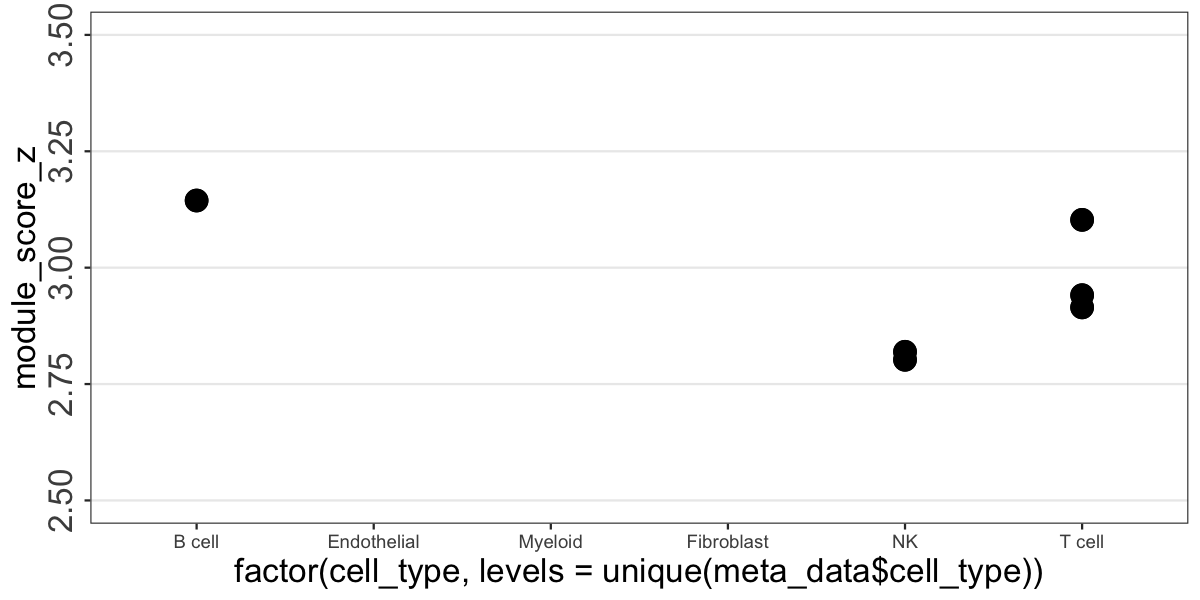

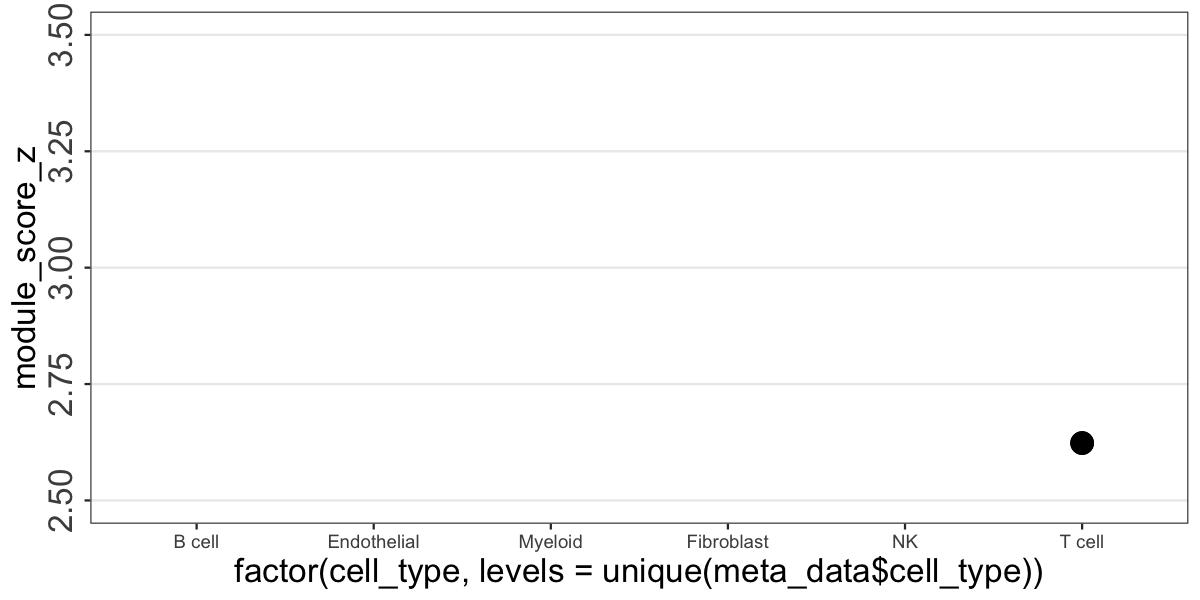

In [51]:

options(repr.plot.height = 5, repr.plot.width =10 ) #[meta_data$pval < 0.1,]
ggplot(scgwas_macro_old_graph, aes(x=factor(cell_type, levels=unique(meta_data$cell_type)), y=module_score_z))+ #fill=cell_type)) +
geom_point(size=6) +  geom_point(shape = 1,size = 6,colour = "black") +
#stat_summary(fun.data=data_summary) + #stat_summary(data=data2, fun.data=data_summary, color="grey40") + 
theme_bw(base_size=14) + 
theme(#legend.position="None", 
      #axis.text.x = element_text(angle=90, size=15), 
     panel.grid.major.x = element_blank(), panel.grid.minor.x = element_blank(), panel.grid.minor.y = element_blank(),
     axis.text.y = element_text(angle=90, size = 20,vjust=1,hjust=0.5), axis.title=element_text(size=20)) + 
theme(strip.background=element_rect(colour="black",
                                    fill="lightgrey"),strip.text = element_text(size = 18, margin = margin()))  + ylim(2.5, 3.5) 

ggplot(scgwas_macro_new_graph, aes(x=factor(cell_type, levels=unique(meta_data$cell_type)), y=module_score_z))+ #fill=cell_type)) +
geom_point(size=6) +  geom_point(shape = 1,size = 6,colour = "black") +
#stat_summary(fun.data=data_summary) + #stat_summary(data=data2, fun.data=data_summary, color="grey40") + 
theme_bw(base_size=14) + 
theme(#legend.position="None", 
      #axis.text.x = element_text(angle=90, size=15), 
     panel.grid.major.x = element_blank(), panel.grid.minor.x = element_blank(), panel.grid.minor.y = element_blank(),
     axis.text.y = element_text(angle=90, size = 20,vjust=1,hjust=0.5), axis.title=element_text(size=20)) + 
theme(strip.background=element_rect(colour="black",
                                    fill="lightgrey"),strip.text = element_text(size = 18, margin = margin()))+ ylim(2.5, 3.5) 
#ggsave("~/Desktop/SC_GWAS_Bench/output/Final_figures/RA/scDRS_RA_macro_scGWAS_scores.pdf", height=5, width=10)

## Finer-grained cell states

In [52]:
scgwas_dir <- "/Users/hopekirby/Desktop/SC_GWAS_Bench/output/scGWAS/"
scgwas_micro_old <- fread(paste0(scgwas_dir, "RA_signif_clusters_2023.sig_module.txt"))
scgwas_micro_new <- fread("/Users/hopekirby/Desktop/SCRNA-GWAS-Benchmarking/output/scGWAS_Path/scGWAS_cluster_new_pathway.sig_module.txt", )
# create a table with the number of groups for each cell_type

scgwas_micro_old_count <- data.frame(table(scgwas_micro_old$cell_type))
scgwas_micro_new_count <- data.frame(table(scgwas_micro_new$cell_type))


replace_dict <- c("M-11: CD16+-DC4" = "M-11: CD16+/DC4", 'T-3: CD4+ Tfh-Tph' = 'T-3: CD4+ Tfh/Tph', 
                  'T-13: CD8+ GZMK-B+ memory' = 'T-13: CD8+ GZMK/B+ memory', 
                  'T-15: CD8+ GZMB+-TEMRA' = 'T-15: CD8+ GZMB+/TEMRA', 'T-16: CD8+ CD45ROlow-naive' = 'T-16: CD8+ CD45ROlow/naive', 
                  'T-17: CD8+ activated-NK-like' = 'T-17: CD8+ activated/NK-like', 
                 "B-0: CD24+CD27+CD11b+ switched memory" = "B-0: CD24+CD27+CD11b+\n switched memory", 
                 "B-1: CD24++CD27+IgM+ unswitched memory" = "B-1: CD24++CD27+IgM+\n unswitched memory")

# fix any misnames
Var2 <- c()
for (cluster in scgwas_micro_old_count$Var1) {
    if (cluster %in% names(replace_dict)) {
        Var2 <- c(Var2, replace_dict[cluster])
        }
    else {
        Var2 <- c(Var2, cluster)
        }
    }
scgwas_micro_old_count$Var1 <- Var2

# fix any misnames
Var2 <- c()
for (cluster in scgwas_micro_new_count$Var1) {
    if (cluster %in% names(replace_dict)) {
        Var2 <- c(Var2, replace_dict[cluster])
        }
    else {
        Var2 <- c(Var2, cluster)
        }
    }
scgwas_micro_new_count$Var1 <- Var2

# fix any misnames
Var2 <- c()
for (cluster in scgwas_micro_old$cell_type) {
    if (cluster %in% names(replace_dict)) {
        Var2 <- c(Var2, replace_dict[cluster])
        }
    else {
        Var2 <- c(Var2, cluster)
        }
    }
scgwas_micro_old$cell_type <- Var2

# fix any misnames
Var2 <- c()
for (cluster in scgwas_micro_new$cell_type) {
    if (cluster %in% names(replace_dict)) {
        Var2 <- c(Var2, replace_dict[cluster])
        }
    else {
        Var2 <- c(Var2, cluster)
        }
    }
scgwas_micro_new$cell_type <- Var2




In [53]:
sig_celltypes = union(scgwas_micro_old$cell_type, scgwas_micro_new$cell_type)
# add if not then
add_df <- data.frame(data.table("Var1"=setdiff(sig_celltypes, scgwas_micro_old_count$Var1), 
                                "Freq"=rep(0, length(setdiff(sig_celltypes, scgwas_micro_old_count$Var1)))))

scgwas_micro_old_count <- rbind(scgwas_micro_old_count, add_df)    

# add if not then
add_df <- data.frame(data.table("Var1"=setdiff(sig_celltypes, scgwas_micro_new_count$Var1), 
                                "Freq"=rep(0, length(setdiff(sig_celltypes, scgwas_micro_new_count$Var1)))))

scgwas_micro_new_count <- rbind(scgwas_micro_new_count, add_df) 


In [54]:
# ensure names are correct
length(setdiff(scgwas_micro_old_count$Var1, names(meta_colors)))
length(setdiff(scgwas_micro_new_count$Var1, names(meta_colors)))
length(setdiff(scgwas_micro_old$cell_type, names(meta_colors)))
length(setdiff(scgwas_micro_new$cell_type, names(meta_colors)))

[1] 0

[1] 0

[1] 0

[1] 0

In [55]:
unique(scgwas_micro_new$cell_type)

[1] "B-3: IgM+IgD+CD1c+ MZ-like"         "B-4: AICDA+BCL6+ GC-like"          
 [3] "NK-13: IL7R+CD161+ ILC"             "NK-2: CD56dim CD16+ IFNG+CD160-"   
 [5] "NK-4: CD56bright CD16- GZMA+CD160+" "NK-6: CD56bright CD16- GNLY+"      
 [7] "NK-9: MT-high"                      "T-10: CD4+ OX40+NR3C1+"            
 [9] "T-11: CD4+ CD146+ memory"           "T-13: CD8+ GZMK/B+ memory"         
[11] "T-14: CD8+ GZMK+ memory"            "T-15: CD8+ GZMB+/TEMRA"            
[13] "T-19: MT-high (low quality)"        "T-2: CD4+ IL7R+CCR5+ memory"       
[15] "T-20: CD38+"                        "T-21: Innate-like"                 
[17] "T-3: CD4+ Tfh/Tph"                  "T-5: CD4+ GZMK+ memory"            
[19] "T-6: CD4+ memory"                   "T-7: CD4+ Tph"                     
[21] "T-8: CD4+ CD25-high Treg"           "T-9: CD4+ CD25-low Treg"

In [56]:
colnames(meta_data)

[1] "sample"                   "cell"                    
 [3] "cluster_number"           "cluster_name"            
 [5] "cell_type"                "subject_id"              
 [7] "percent.mito"             "nGene"                   
 [9] "nUMI"                     "redcap_data_access_group"
[11] "age"                      "sex"                     
[13] "RA_duration_years"        "Race_white"

In [57]:
scgwas_micro_old_graph <- scgwas_micro_old[,c("cell_type", "module_score_z")]

scgwas_micro_new_graph <- scgwas_micro_new[,c("cell_type", "module_score_z")]


length(intersect(scgwas_micro_old$cell_type, scgwas_micro_new$cell_type))
length(setdiff(scgwas_micro_old$cell_type, scgwas_micro_new$cell_type))
length(setdiff(scgwas_micro_new$cell_type, scgwas_micro_old$cell_type))

# add if not then
add_df <- data.frame(data.table("cell_type"=setdiff(names(meta_colors), scgwas_micro_old$cell_type), 
                                "module_score_z"=rep(0, length(setdiff(names(meta_colors), scgwas_micro_old$cell_type)))))

scgwas_micro_old_graph <- rbind(scgwas_micro_old_graph, add_df)    

# add if not then
add_df <- data.frame(data.table("cell_type"=setdiff(names(meta_colors), scgwas_micro_new$cell_type), 
                                "module_score_z"=rep(0, length(setdiff(names(meta_colors), scgwas_micro_new$cell_type)))))

scgwas_micro_new_graph <- rbind(scgwas_micro_new_graph, add_df) 




[1] 22

[1] 14

[1] 0

#### Get ranked colors

In [59]:
# read in macro & micro tables
output_dir <- "/Users/hopekirby/Desktop/SC_GWAS_Bench/output/SCDRS/RA_53/"
micro_table <- fread(paste0(output_dir, "RA.scdrs_group.cell_type_micro"))

# add spaces to the long clusters
add_spaces_dict <- c("B-0: CD24+CD27+CD11b+\n switched memory", 
                    "B-1: CD24++CD27+IgM+\n unswitched memory")
names(add_spaces_dict) <- c("B-0: CD24+CD27+CD11b+ switched memory", "B-1: CD24++CD27+IgM+ unswitched memory")
setdiff(names(add_spaces_dict), meta_data$cluster_name)
meta_data$cluster_name2 <- as.character(meta_data$cluster_name)
micro_table$group2 <- as.character(micro_table$group)
for (cell_group in names(add_spaces_dict)) {
    print(add_spaces_dict[cell_group])
    print(dim(meta_data[meta_data$cluster_name == cell_group,]))
    meta_data[meta_data$cluster_name == cell_group,]$cluster_name2 <- add_spaces_dict[cell_group]
    micro_table[micro_table$group == cell_group,]$group2 <- add_spaces_dict[cell_group]
    }

# list to add the ranked clusters within cell types
ranked_cell_clusters <- c()
for (cell_type in meta_colors1) {
    # get the ranked cells in that group
    data <- micro_table[micro_table$group2 %in% names(cell_type),]
    data <- data[order(assoc_mcz),]
    # now add the ranked cells to a list
    ranked_cell_clusters <- c(ranked_cell_clusters, data$group2)
    } 

character(0)

    B-0: CD24+CD27+CD11b+ switched memory 
"B-0: CD24+CD27+CD11b+\n switched memory" 
[1] 5606   15
    B-1: CD24++CD27+IgM+ unswitched memory 
"B-1: CD24++CD27+IgM+\n unswitched memory" 
[1] 2958   15


In [60]:
length(sig_celltypes)
sig_celltypes
# get the same order as the meta_colors
sig_celltypes = intersect(ranked_cell_clusters, sig_celltypes)
sig_celltypes

[1] 36

[1] "B-2: IgM+IgD+TCL1A+ naive"           "B-3: IgM+IgD+CD1c+ MZ-like"         
 [3] "B-4: AICDA+BCL6+ GC-like"            "M-11: CD16+/DC4"                    
 [5] "NK-0: CD56dim CD16+ IFNG-"           "NK-13: IL7R+CD161+ ILC"             
 [7] "NK-2: CD56dim CD16+ IFNG+CD160-"     "NK-3: CD56dim CD16+ GZMB-"          
 [9] "NK-4: CD56bright CD16- GZMA+CD160+"  "NK-6: CD56bright CD16- GNLY+"       
[11] "NK-7: CD56bright CD16- GNLY+CD69+"   "NK-8: CD56bright CD16- IFN response"
[13] "NK-9: MT-high"                       "T-0: CD4+ IL7R+ memory"             
[15] "T-1: CD4+ CD161+ memory"             "T-10: CD4+ OX40+NR3C1+"             
[17] "T-11: CD4+ CD146+ memory"            "T-12: CD4+ GNLY+"                   
[19] "T-13: CD8+ GZMK/B+ memory"           "T-14: CD8+ GZMK+ memory"            
[21] "T-15: CD8+ GZMB+/TEMRA"              "T-16: CD8+ CD45ROlow/naive"         
[23] "T-17: CD8+ activated/NK-like"        "T-18: Proliferating"                
[25] "T-19: MT-high (low quality)"         "T-2: CD4+ IL7R+CCR5+ memory"        
[27] "T-20: CD38+"                         "T-21: Innate-like"                  
[29] "T-23: Vdelta2"                       "T-3: CD4+ Tfh/Tph"                  
[31] "T-4: CD4+ naive"                     "T-5: CD4+ GZMK+ memory"             
[33] "T-6: CD4+ memory"                    "T-7: CD4+ Tph"                      
[35] "T-8: CD4+ CD25-high Treg"            "T-9: CD4+ CD25-low Treg"

[1] "B-2: IgM+IgD+TCL1A+ naive"           "B-3: IgM+IgD+CD1c+ MZ-like"         
 [3] "B-4: AICDA+BCL6+ GC-like"            "M-11: CD16+/DC4"                    
 [5] "NK-8: CD56bright CD16- IFN response" "NK-4: CD56bright CD16- GZMA+CD160+" 
 [7] "NK-6: CD56bright CD16- GNLY+"        "NK-9: MT-high"                      
 [9] "NK-3: CD56dim CD16+ GZMB-"           "NK-0: CD56dim CD16+ IFNG-"          
[11] "NK-13: IL7R+CD161+ ILC"              "NK-7: CD56bright CD16- GNLY+CD69+"  
[13] "NK-2: CD56dim CD16+ IFNG+CD160-"     "T-23: Vdelta2"                      
[15] "T-19: MT-high (low quality)"         "T-15: CD8+ GZMB+/TEMRA"             
[17] "T-16: CD8+ CD45ROlow/naive"          "T-12: CD4+ GNLY+"                   
[19] "T-21: Innate-like"                   "T-14: CD8+ GZMK+ memory"            
[21] "T-17: CD8+ activated/NK-like"        "T-4: CD4+ naive"                    
[23] "T-5: CD4+ GZMK+ memory"              "T-13: CD8+ GZMK/B+ memory"          
[25] "T-0: CD4+ IL7R+ memory"              "T-2: CD4+ IL7R+CCR5+ memory"        
[27] "T-1: CD4+ CD161+ memory"             "T-9: CD4+ CD25-low Treg"            
[29] "T-6: CD4+ memory"                    "T-3: CD4+ Tfh/Tph"                  
[31] "T-18: Proliferating"                 "T-10: CD4+ OX40+NR3C1+"             
[33] "T-7: CD4+ Tph"                       "T-11: CD4+ CD146+ memory"           
[35] "T-20: CD38+"                         "T-8: CD4+ CD25-high Treg"

Warning message:
“Removed 14 rows containing missing values or values outside the scale range
(`geom_point()`).”
Warning message:
“Removed 14 rows containing missing values or values outside the scale range
(`geom_point()`).”


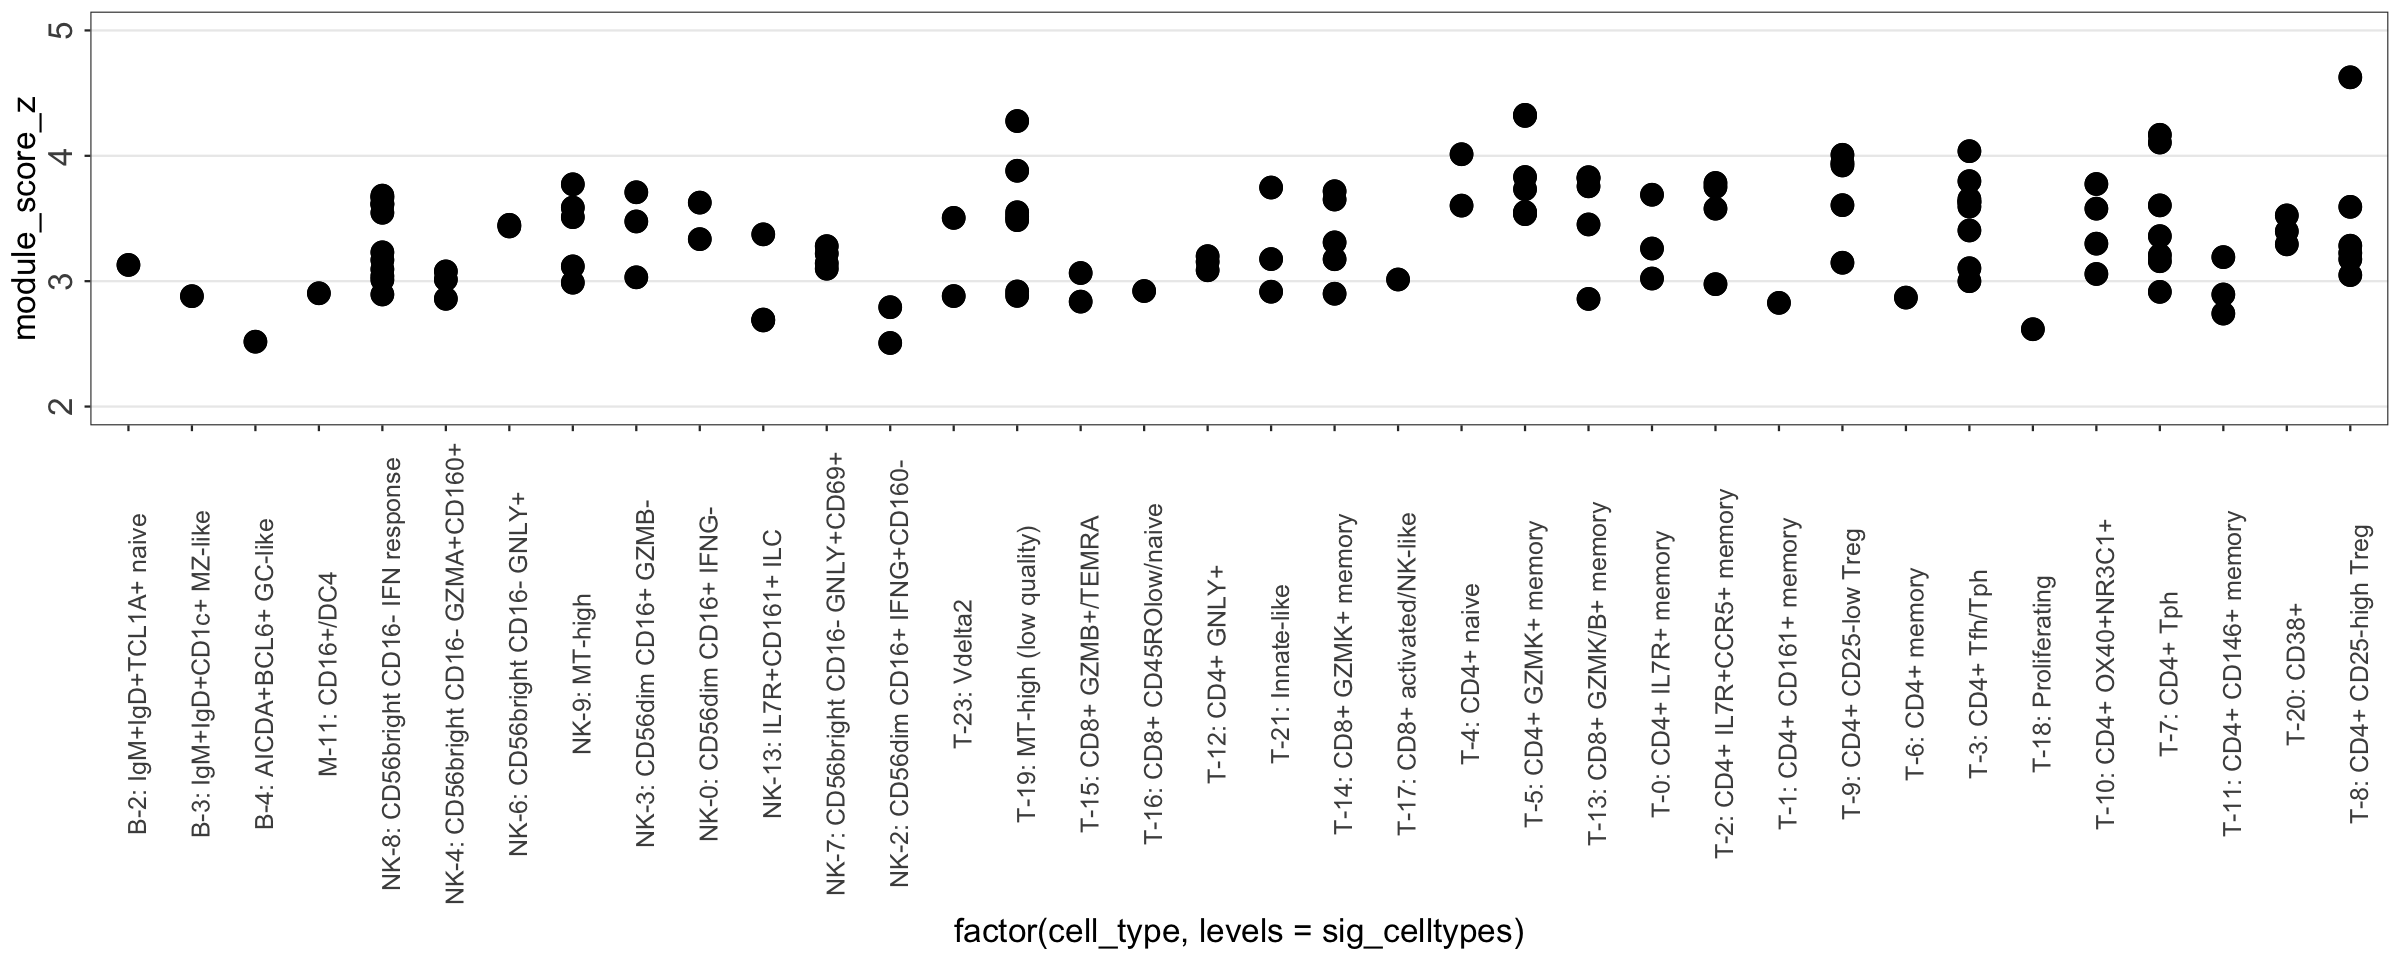

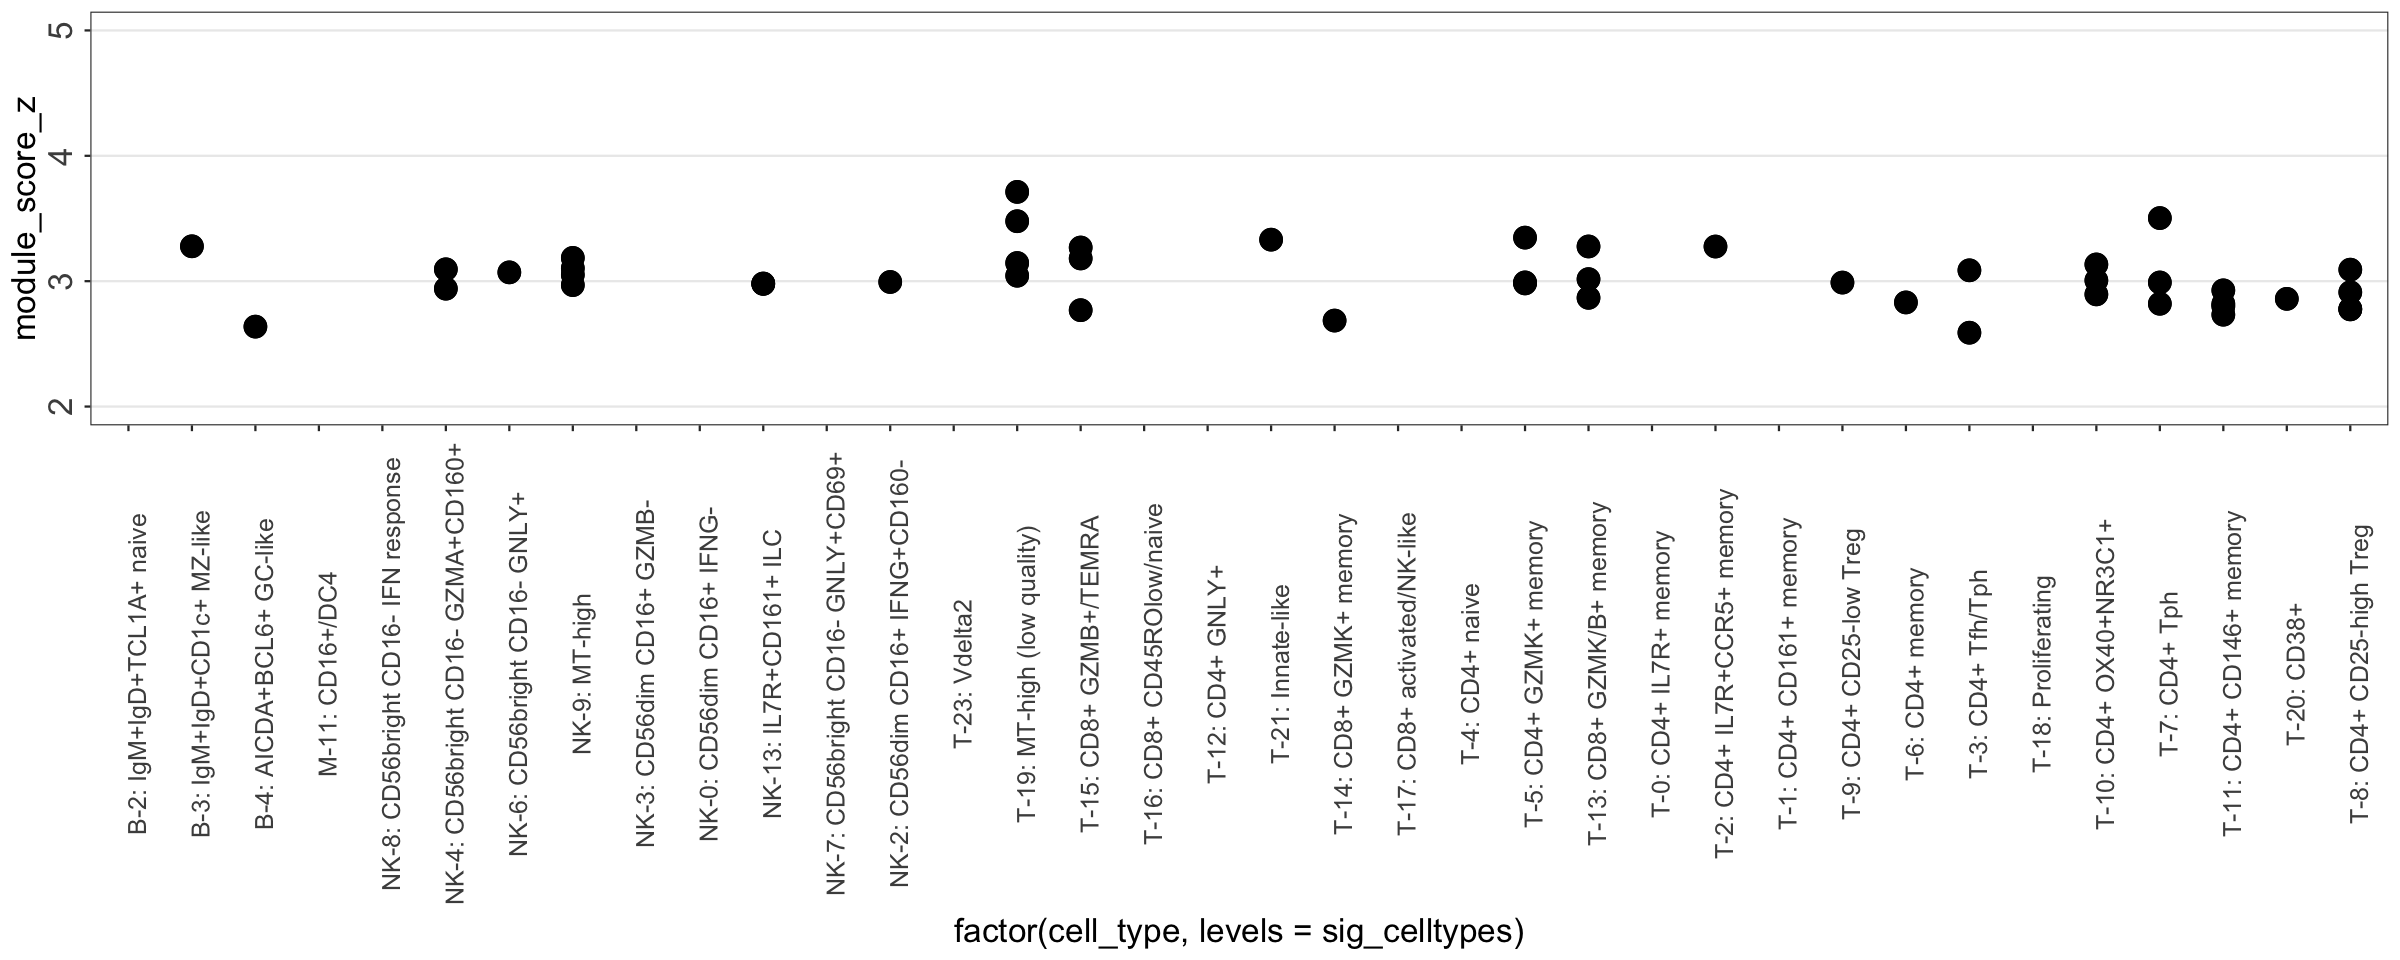

In [61]:

options(repr.plot.height = 8, repr.plot.width =20 ) #[meta_data$pval < 0.1,]
ggplot(scgwas_micro_old_graph[scgwas_micro_old_graph$cell_type %in% sig_celltypes,], aes(x=factor(cell_type, levels=sig_celltypes), y=module_score_z))+ #fill=cell_type)) +
geom_point(size=6) +  geom_point(shape = 1,size = 6,colour = "black") +
theme_bw(base_size=14) + 
theme(#legend.position="None", 
      axis.text.x = element_text(angle=90, size=15), 
     panel.grid.major.x = element_blank(), panel.grid.minor.x = element_blank(), panel.grid.minor.y = element_blank(),
     axis.text.y = element_text(angle=90, size = 20,vjust=1,hjust=0.5), axis.title=element_text(size=20)) + 
theme(strip.background=element_rect(colour="black",
                                    fill="lightgrey"),strip.text = element_text(size = 18, margin = margin()))  + ylim(2, 5)

ggplot(scgwas_micro_new_graph[scgwas_micro_new_graph$cell_type %in% sig_celltypes,], aes(x=factor(cell_type, levels=sig_celltypes), y=module_score_z))+ #fill=cell_type)) +
geom_point(size=6) +  geom_point(shape = 1,size = 6,colour = "black") +
#stat_summary(fun.data=data_summary) + #stat_summary(data=data2, fun.data=data_summary, color="grey40") + 
theme_bw(base_size=14) + 
theme(#legend.position="None", 
      axis.text.x = element_text(angle=90, size=15), 
     panel.grid.major.x = element_blank(), panel.grid.minor.x = element_blank(), panel.grid.minor.y = element_blank(),
     axis.text.y = element_text(angle=90, size = 20,vjust=1,hjust=0.5), axis.title=element_text(size=20)) + 
theme(strip.background=element_rect(colour="black",
                                    fill="lightgrey"),strip.text = element_text(size = 18, margin = margin())) + ylim(2, 5)
#ggsave("~/Desktop/SC_GWAS_Bench/output/Final_figures/RA/scDRS_RA_macro_scGWAS_scores.pdf", height=5, width=10)

Warning message:
“Removed 41 rows containing missing values or values outside the scale range
(`geom_point()`).”
Warning message:
“Removed 41 rows containing missing values or values outside the scale range
(`geom_point()`).”
Warning message:
“Removed 55 rows containing missing values or values outside the scale range
(`geom_point()`).”
Warning message:
“Removed 55 rows containing missing values or values outside the scale range
(`geom_point()`).”


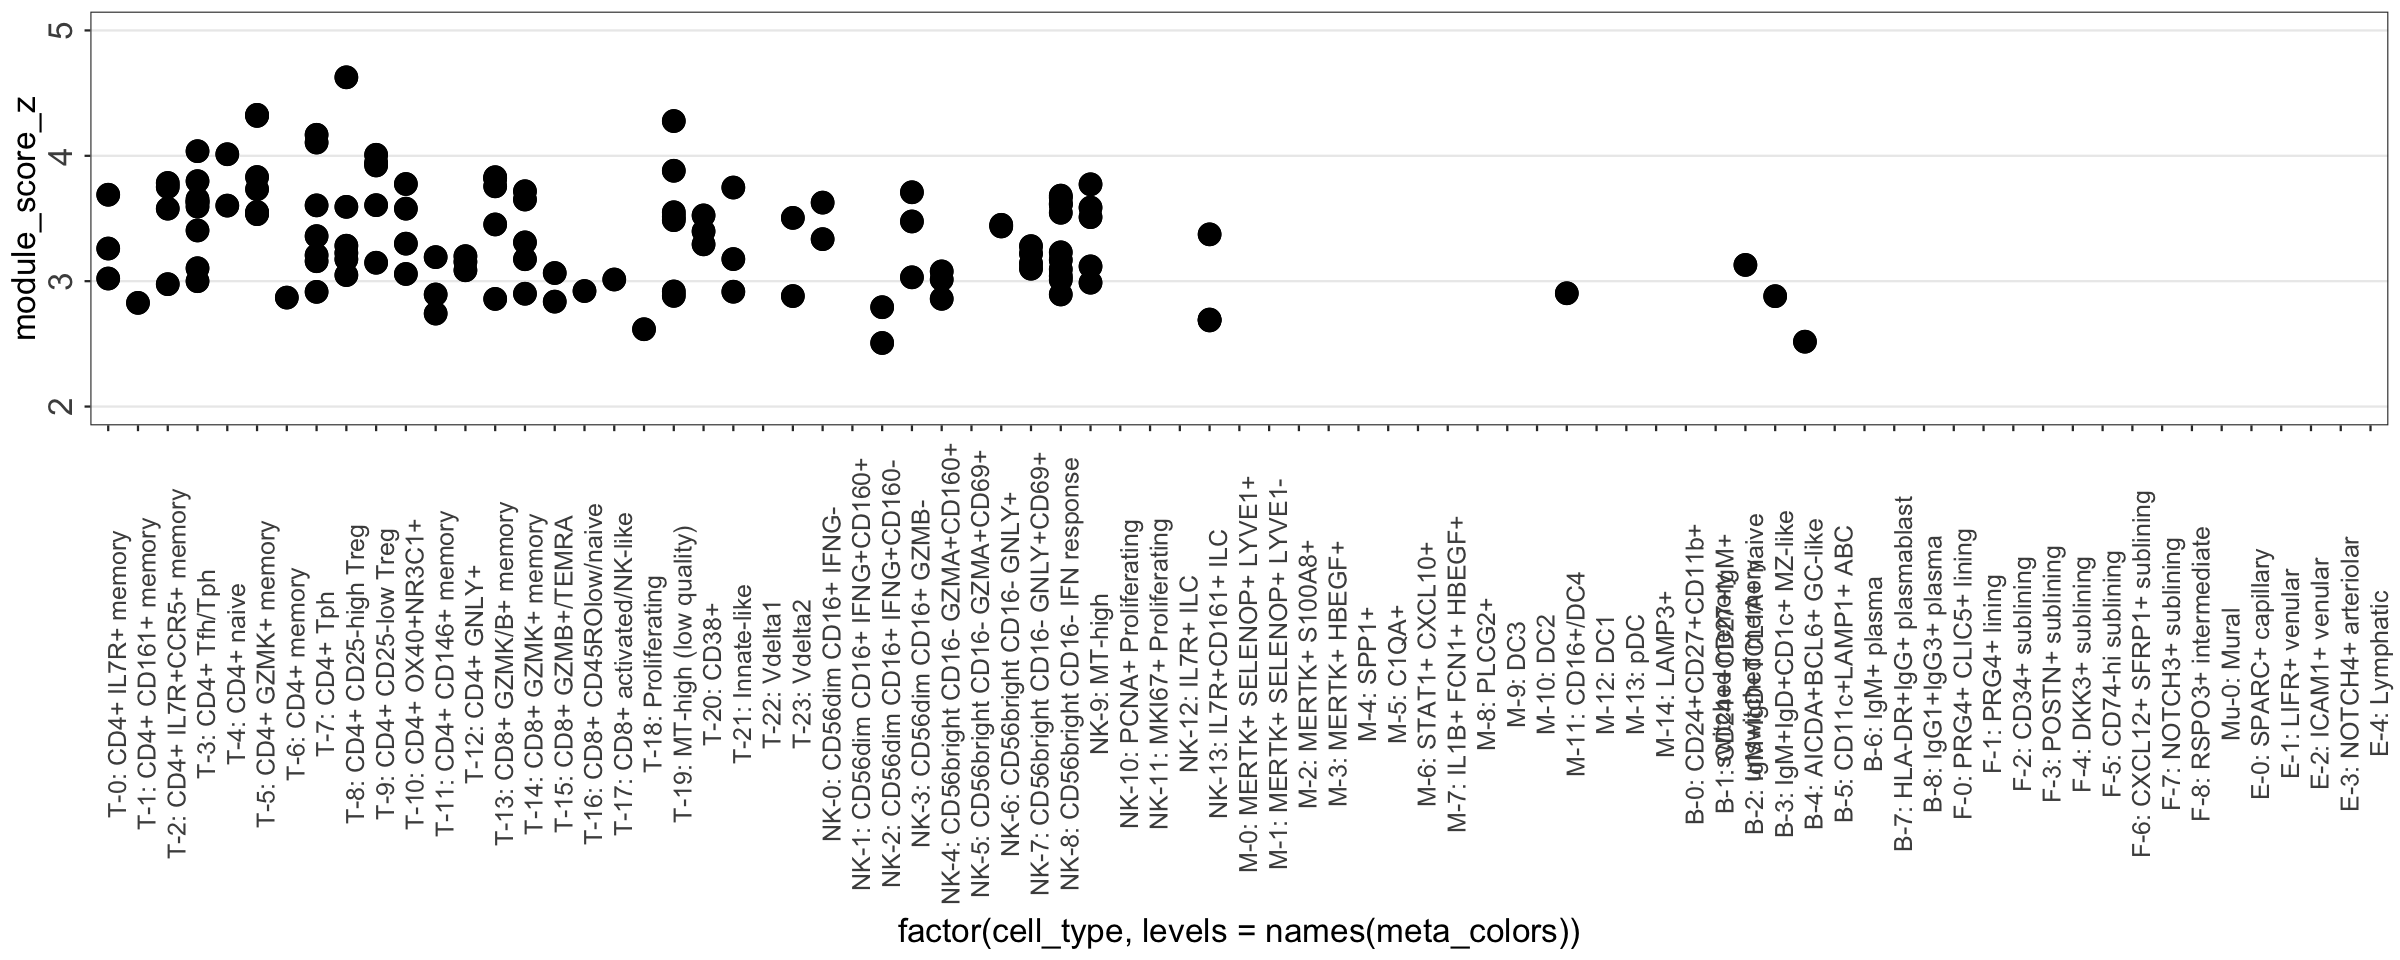

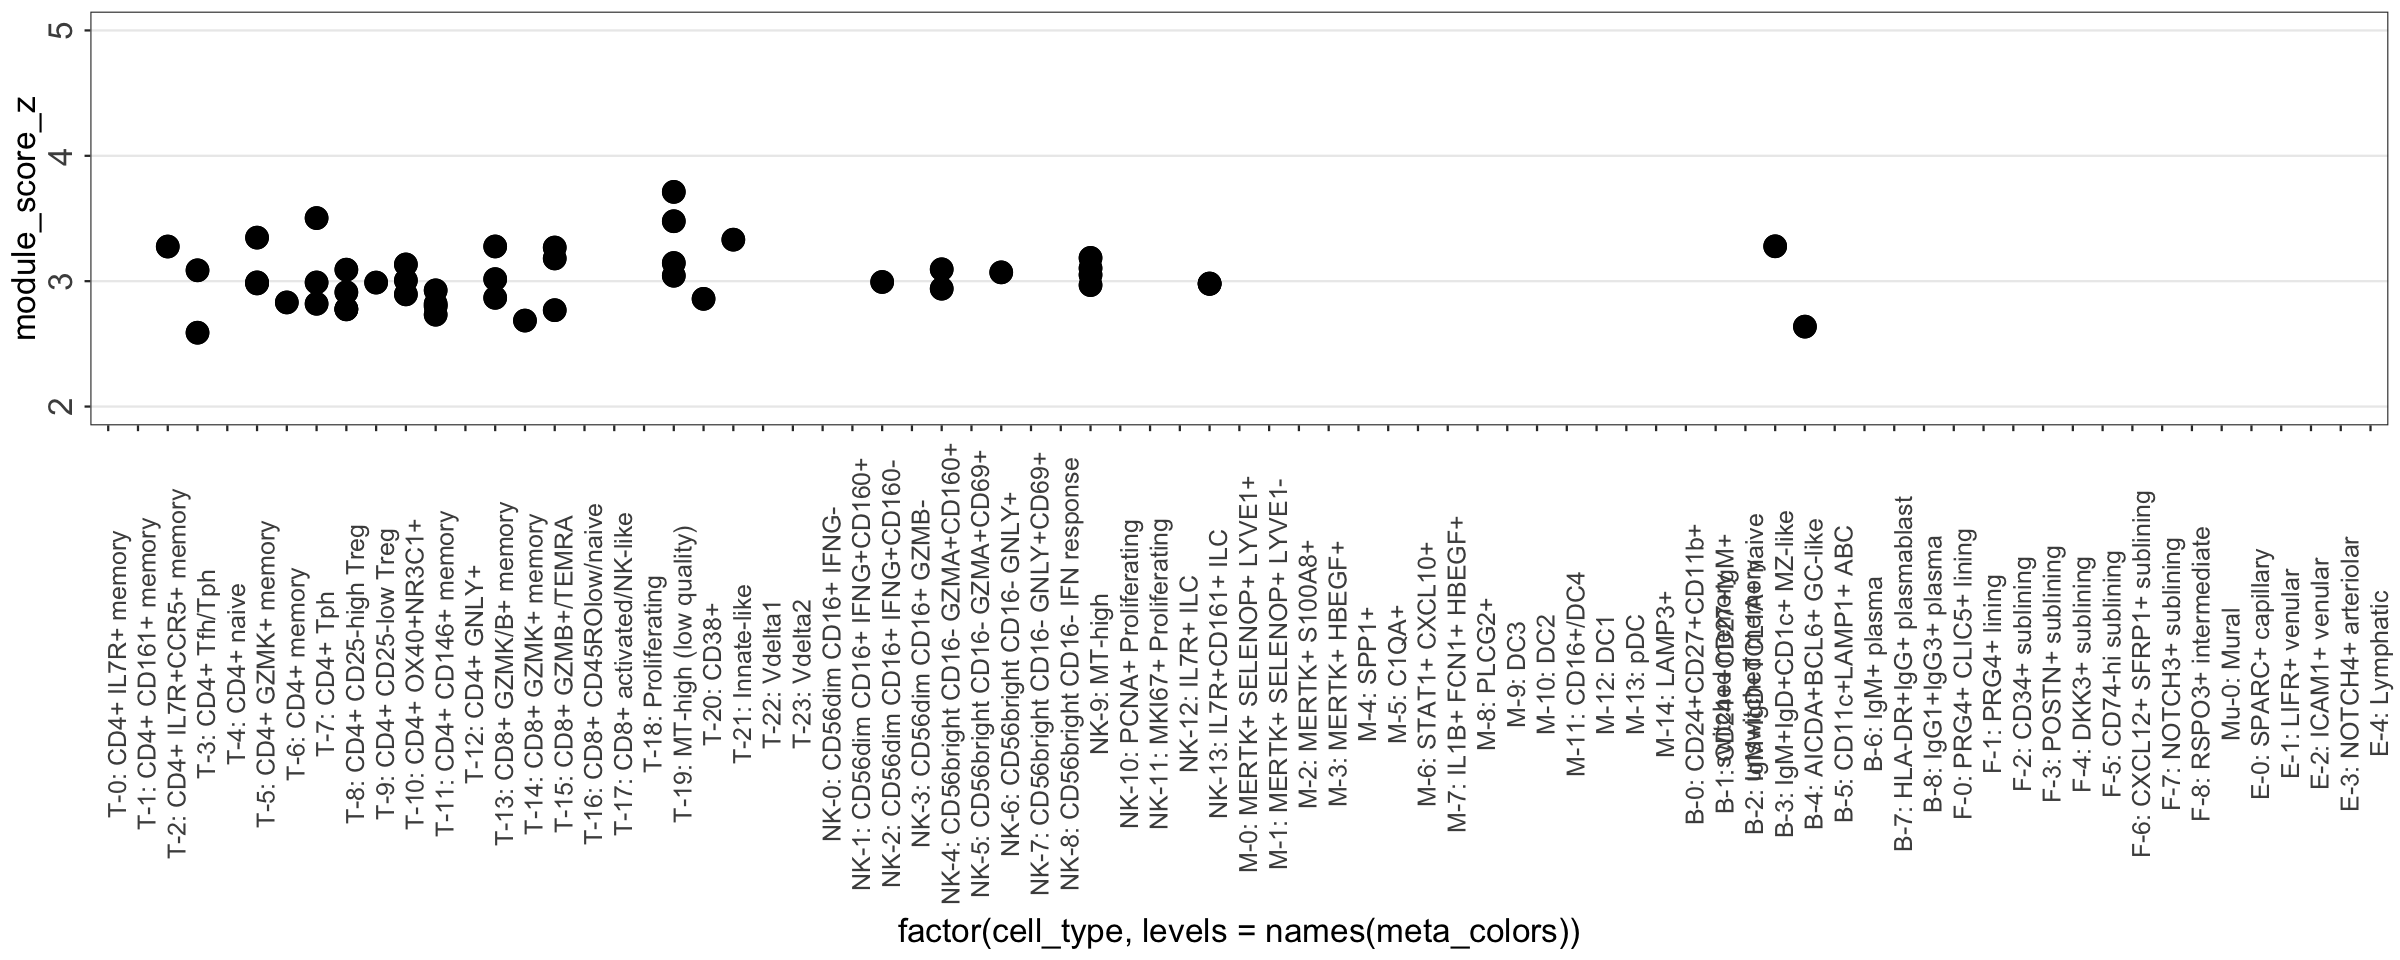

In [62]:

options(repr.plot.height = 8, repr.plot.width =20 ) #[meta_data$pval < 0.1,]
ggplot(scgwas_micro_old_graph, aes(x=factor(cell_type, levels=names(meta_colors)), y=module_score_z))+ #fill=cell_type)) +
geom_point(size=6) +  geom_point(shape = 1,size = 6,colour = "black") +
theme_bw(base_size=14) + 
theme(#legend.position="None", 
      axis.text.x = element_text(angle=90, size=15), 
     panel.grid.major.x = element_blank(), panel.grid.minor.x = element_blank(), panel.grid.minor.y = element_blank(),
     axis.text.y = element_text(angle=90, size = 20,vjust=1,hjust=0.5), axis.title=element_text(size=20)) + 
theme(strip.background=element_rect(colour="black",
                                    fill="lightgrey"),strip.text = element_text(size = 18, margin = margin()))  + ylim(2, 5)

ggplot(scgwas_micro_new_graph, aes(x=factor(cell_type, levels=names(meta_colors)), y=module_score_z))+ #fill=cell_type)) +
geom_point(size=6) +  geom_point(shape = 1,size = 6,colour = "black") +
#stat_summary(fun.data=data_summary) + #stat_summary(data=data2, fun.data=data_summary, color="grey40") + 
theme_bw(base_size=14) + 
theme(#legend.position="None", 
      axis.text.x = element_text(angle=90, size=15), 
     panel.grid.major.x = element_blank(), panel.grid.minor.x = element_blank(), panel.grid.minor.y = element_blank(),
     axis.text.y = element_text(angle=90, size = 20,vjust=1,hjust=0.5), axis.title=element_text(size=20)) + 
theme(strip.background=element_rect(colour="black",
                                    fill="lightgrey"),strip.text = element_text(size = 18, margin = margin())) + ylim(2, 5)
#ggsave("~/Desktop/SC_GWAS_Bench/output/Final_figures/RA/scDRS_RA_macro_scGWAS_scores.pdf", height=5, width=10)

## Do based on number of gene modules  now

In [63]:
scgwas_micro_old_count[1:2,]
dim(scgwas_micro_old_count)
dim(scgwas_micro_new_count)

,Var1,Freq
,<chr>,<int>
1,B-2: IgM+IgD+TCL1A+ naive,1
2,B-3: IgM+IgD+CD1c+ MZ-like,1


[1] 36  2

[1] 36  2

In [64]:
unique(scgwas_micro_new_count$Freq)
unique(scgwas_micro_old_count$Freq)
sort(union(unique(scgwas_micro_new_count$Freq),
unique(scgwas_micro_old_count$Freq)))

[1] 1 2 4 3 0

[1]  1  2  3  4 11  5  7  9  6

[1]  0  1  2  3  4  5  6  7  9 11

In [82]:
scgwas_micro_new[1:2,]
unique(scgwas_micro_new$cell_type)
unique(scgwas_micro_new_count$Var1)

module_genes,seed,edges,module_score,m_gwas,m_scrnaseq,module_score_z,z_gwas,z_scrnaseq,cell_type,trait,panel,p,p_gwas,p_scrn
<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>
CD79B:CORO1A:IKZF3:PTPRC:REL:STAT1,SPHK2,121536:387441:271633:121543:33543:387442:296062:121466:33532,11.783220,8.540589,5.437117,3.278324,2.088013,2.071921,B-3: IgM+IgD+CD1c+ MZ-like,RA,RA,0.000343112,0.03242409,0.01938583
CORO1A:IKZF3:REL,JRK,121536:296062:121466,9.236495,6.568353,4.283662,2.637551,2.150332,1.735099,B-4: AICDA+BCL6+ GC-like,RA,RA,0.003122212,0.02780256,0.03047874


[1] "B-3: IgM+IgD+CD1c+ MZ-like"         "B-4: AICDA+BCL6+ GC-like"          
 [3] "NK-13: IL7R+CD161+ ILC"             "NK-2: CD56dim CD16+ IFNG+CD160-"   
 [5] "NK-4: CD56bright CD16- GZMA+CD160+" "NK-6: CD56bright CD16- GNLY+"      
 [7] "NK-9: MT-high"                      "T-10: CD4+ OX40+NR3C1+"            
 [9] "T-11: CD4+ CD146+ memory"           "T-13: CD8+ GZMK/B+ memory"         
[11] "T-14: CD8+ GZMK+ memory"            "T-15: CD8+ GZMB+/TEMRA"            
[13] "T-19: MT-high (low quality)"        "T-2: CD4+ IL7R+CCR5+ memory"       
[15] "T-20: CD38+"                        "T-21: Innate-like"                 
[17] "T-3: CD4+ Tfh/Tph"                  "T-5: CD4+ GZMK+ memory"            
[19] "T-6: CD4+ memory"                   "T-7: CD4+ Tph"                     
[21] "T-8: CD4+ CD25-high Treg"           "T-9: CD4+ CD25-low Treg"

[1] "B-3: IgM+IgD+CD1c+ MZ-like"          "B-4: AICDA+BCL6+ GC-like"           
 [3] "NK-13: IL7R+CD161+ ILC"              "NK-2: CD56dim CD16+ IFNG+CD160-"    
 [5] "NK-4: CD56bright CD16- GZMA+CD160+"  "NK-6: CD56bright CD16- GNLY+"       
 [7] "NK-9: MT-high"                       "T-10: CD4+ OX40+NR3C1+"             
 [9] "T-11: CD4+ CD146+ memory"            "T-13: CD8+ GZMK/B+ memory"          
[11] "T-14: CD8+ GZMK+ memory"             "T-15: CD8+ GZMB+/TEMRA"             
[13] "T-19: MT-high (low quality)"         "T-2: CD4+ IL7R+CCR5+ memory"        
[15] "T-20: CD38+"                         "T-21: Innate-like"                  
[17] "T-3: CD4+ Tfh/Tph"                   "T-5: CD4+ GZMK+ memory"             
[19] "T-6: CD4+ memory"                    "T-7: CD4+ Tph"                      
[21] "T-8: CD4+ CD25-high Treg"            "T-9: CD4+ CD25-low Treg"            
[23] "B-2: IgM+IgD+TCL1A+ naive"           "M-11: CD16+/DC4"                    
[25] "NK-0: CD56dim CD16+ IFNG-"           "NK-3: CD56dim CD16+ GZMB-"          
[27] "NK-7: CD56bright CD16- GNLY+CD69+"   "NK-8: CD56bright CD16- IFN response"
[29] "T-0: CD4+ IL7R+ memory"              "T-1: CD4+ CD161+ memory"            
[31] "T-12: CD4+ GNLY+"                    "T-16: CD8+ CD45ROlow/naive"         
[33] "T-17: CD8+ activated/NK-like"        "T-18: Proliferating"                
[35] "T-23: Vdelta2"                       "T-4: CD4+ naive"

In [83]:
# for each, get the maximum module Z score
max_scores = c()
for (group in scgwas_micro_old_count$Var1) {
    # get the max zscore from the scgwas_micro
    filt = scgwas_micro_old[scgwas_micro_old$cell_type == group,]
    if (nrow(filt) == 0) {
        cat("\n", group)
        stop("Problem") }  else {
        max_scores = c(max_scores, max(filt$module_score_z))
        }
    }
length(max_scores)
dim(scgwas_micro_old_count)
scgwas_micro_old_count$Max_Zscore = max_scores


max_scores = c()
for (group in scgwas_micro_new_count$Var1) {
    # get the max zscore from the scgwas_micro
    filt = scgwas_micro_new[scgwas_micro_new$cell_type == group,]
    if (nrow(filt) == 0) {
        max_scores = c(max_scores, 0)
        }  else {
        max_scores = c(max_scores, max(filt$module_score_z))
        }
    }
scgwas_micro_new_count$Max_Zscore = max_scores

[1] 36

[1] 36  3

In [65]:
library(RColorBrewer)
brewer.pal(10, "YlGnBu")
backup_colors=c("1"='#FFFFD9', "2"='#EDF8B1', "3"='#C7E9B4', 
                "4"='#7FCDBB', "5"="#41B6C4", "6"="#1D91C0", 
                "7"='#7FCDBB',  "9"='#253494', "11"='#081D58', "0"="white")


Warning message in brewer.pal(10, "YlGnBu"):
“n too large, allowed maximum for palette YlGnBu is 9
Returning the palette you asked for with that many colors
”


[1] "#FFFFD9" "#EDF8B1" "#C7E9B4" "#7FCDBB" "#41B6C4" "#1D91C0" "#225EA8"
[8] "#253494" "#081D58"

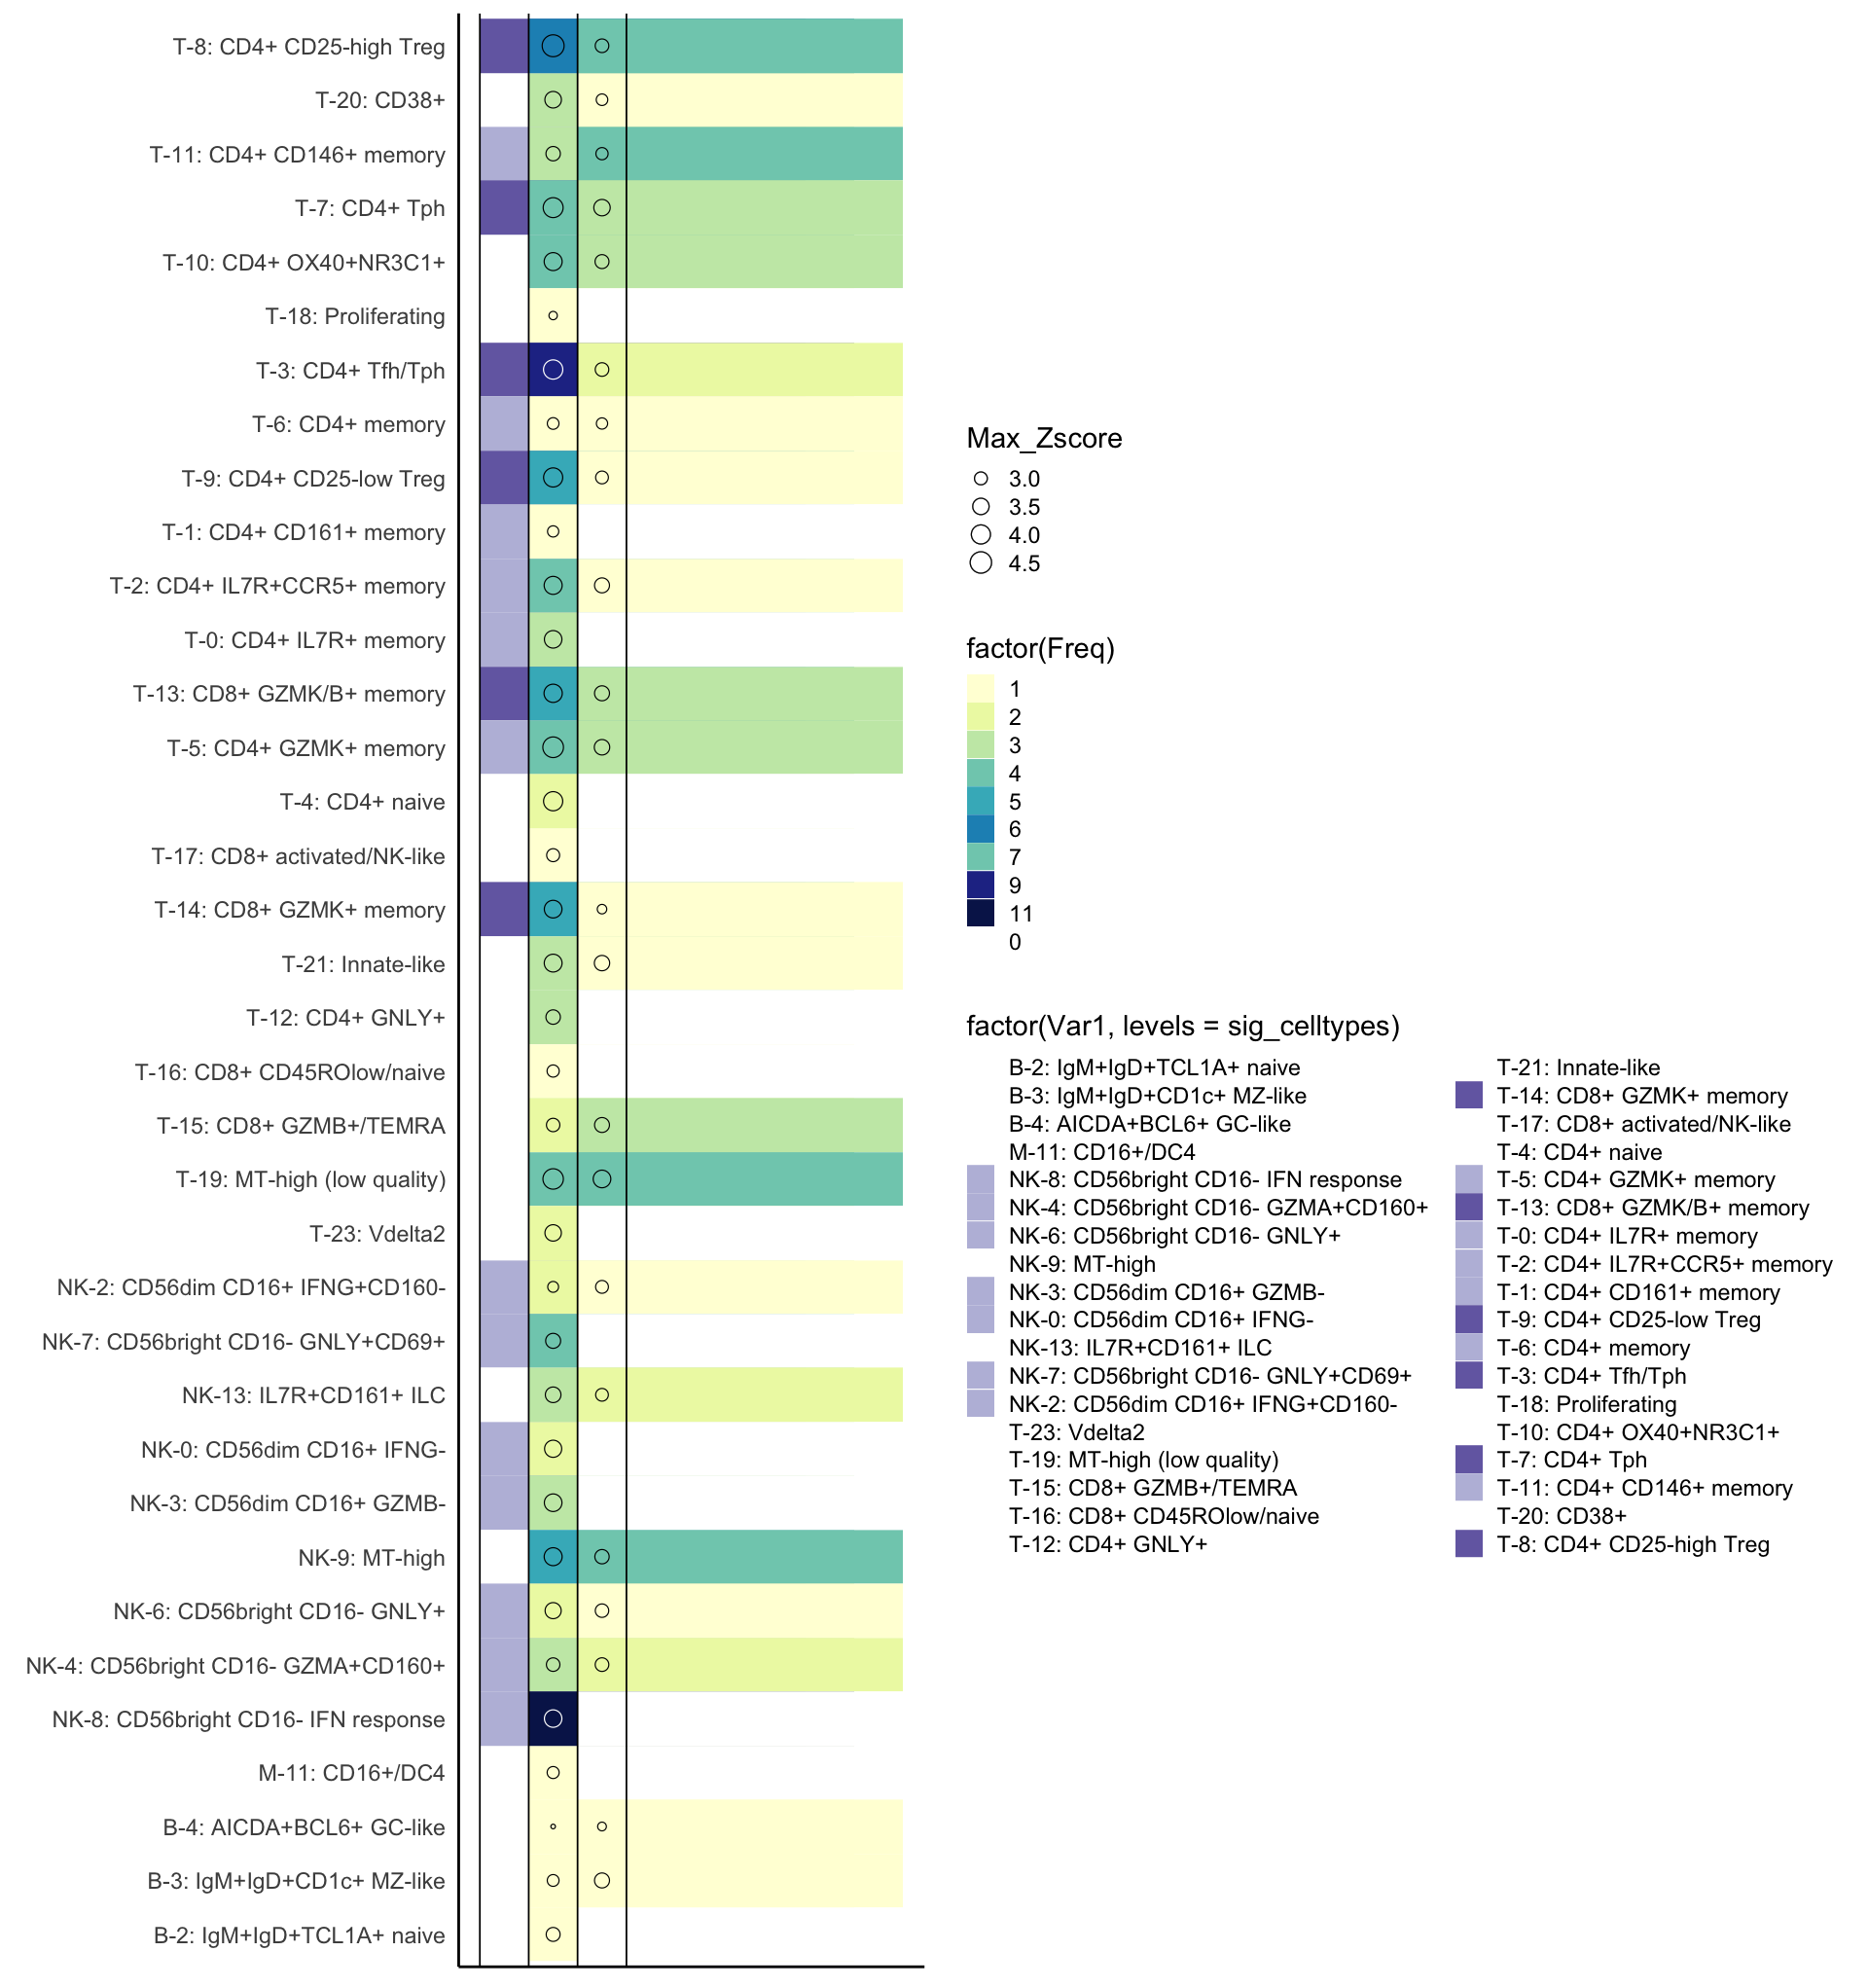

In [120]:
library(ggplot2)
library(ggnewscale)
options(repr.plot.height = 0.473098330241187*length(sig_celltypes), repr.plot.width =16)
white_list = c("T-3: CD4+ Tfh/Tph", "NK-8: CD56bright CD16- IFN response")
p1 <- ggplot(scgwas_micro_old_count) + 
  # First layer: discrete fill
  geom_tile(aes(x=0, y=factor(Var1, levels=sig_celltypes), fill=factor(Var1, levels=sig_celltypes))) +
  scale_fill_manual(values=exp_colors_ra) + 
  new_scale("fill") + 
  
  # Second layer: continuous fill
  geom_tile(aes(fill=factor(Freq), x=0.15, y=Var1 )) + 
geom_point(data=scgwas_micro_old_count[!scgwas_micro_old_count$Var1 %in% white_list,], aes(x=-.275, y=Var1, size=Max_Zscore),color='black', fill='black', shape=1) +
geom_point(data=scgwas_micro_old_count[scgwas_micro_old_count$Var1 %in% white_list,], aes(x=-.275, y=Var1, size=Max_Zscore),color='white', fill='white', shape=1) +
  scale_fill_manual(values = backup_colors) +


# NEW
geom_tile(data=scgwas_micro_new_count, aes(x=0.3, y=factor(Var1, levels=sig_celltypes), fill=factor(Freq))) +
geom_point(data=scgwas_micro_new_count[scgwas_micro_new_count$Max_Zscore != 0,], aes(x=-.125, y=Var1, size=Max_Zscore),color='black', fill='black', shape=1) +
    geom_vline(xintercept=-0.35) + geom_vline(xintercept=-0.5) +geom_vline(xintercept=-0.2) +
    geom_vline(xintercept=-0.05) +
  # Theme settings
theme_classic(base_size =17.5) + 
  theme(#legend.position="none", 
        axis.text.x = element_blank(),
        axis.title.y = element_blank(), 
        axis.ticks.y = element_blank(), 
        axis.ticks.x = element_blank(), 
        axis.title.x = element_blank())
p1

In [121]:
#options(repr.plot.height = 0.473098330241187*nrow(micro_0), repr.plot.width =11)
pdf("./scGWAS_path.pdf", width=16, height=0.473098330241187*length(sig_celltypes))
print(p1)
dev.off() 

pdf 
  2

### Compare the list of genes found significant

In [125]:
length(sig_celltypes)

[1] 36

In [126]:
# have each cell type: genes for scgwas
ra_cell_gene_dict_old = list()
ra_cell_cluster_list_old = list()
ra_cell_gene_list_old = list()

ra_cell_gene_dict_new = list()
ra_cell_cluster_list_new = list()
ra_cell_gene_list_new = list()


for (cluster in sig_celltypes) {
    # get only the gene modules for cell type OLD
    filtered <- scgwas_micro_old[scgwas_micro_old$cell_type == cluster,]
    ra_cell_gene_dict_old[cluster] = list(c(do.call(c, strsplit(filtered$module_genes, split = ":")), 
                                    filtered$seed))
    ra_cell_cluster_list_old <- append(ra_cell_cluster_list_old, cluster)
    ra_cell_gene_list_old <- append(ra_cell_gene_list_old, 
                             list(c(do.call(c, strsplit(filtered$module_genes, split = ":")), 
                                    filtered$seed)))
    # get only the gene modules for cell type NEW
    filtered <- scgwas_micro_new[scgwas_micro_new$cell_type == cluster,]
    ra_cell_gene_dict_new[cluster] = list(c(do.call(c, strsplit(filtered$module_genes, split = ":")), 
                                    filtered$seed))
    ra_cell_cluster_list_new <- append(ra_cell_cluster_list_new, cluster)
    ra_cell_gene_list_new <- append(ra_cell_gene_list_new, 
                             list(c(do.call(c, strsplit(filtered$module_genes, split = ":")), 
                                    filtered$seed)))
    }
ra_cell_gene_dict_new[cluster]
ra_cell_gene_dict_old[cluster]

$`T-8: CD4+ CD25-high Treg`
 [1] "CD2"     "CORO1A"  "CTLA4"   "ETS1"    "LCK"     "CD2"     "CD247"  
 [8] "CTLA4"   "PTPRC"   "CD2"     "PTPRC"   "STAT1"   "TNFAIP3" "CD2"    
[15] "DDX6"    "PTPRC"   "LCK"     "MYCBP2"  "RABAC1"  "ASCC2"

$`T-8: CD4+ CD25-high Treg`
 [1] "CD2"     "CORO1A"  "CTLA4"   "ETS1"    "LCK"     "PTPRC"   "CD2"    
 [8] "CD247"   "CORO1A"  "CTLA4"   "ETS1"    "CD28"    "CORO1A"  "ETS1"   
[15] "ICOS"    "NCOR1"   "PTPRC"   "CD2"     "PTPRC"   "STAT1"   "TNFAIP3"
[22] "CD2"     "DDX6"    "PTPRC"   "REL"     "CD2"     "DDX6"    "PTPRC"  
[29] "TSPAN17" "MED17"   "MED27"   "NUDT2"   "TBC1D1"  "ASCC1"

In [132]:
# read in pathway files
path_v14 = fread("~/Desktop/SCRNA-GWAS-Benchmarking/data//Pathway/PathwayCommons14.All.hgnc.exPCDHA.MHC.NCBI38.tsv", header=FALSE)
path_v12 = fread("~/Downloads/PathwayCommons12.All.hgnc.exPCDHA.MHC.NCBI37.tsv", header=FALSE)
path_v14[1:2]
v14_genes = union(path_v14$V1, path_v14$V2)
v12_genes = union(path_v12$V1, path_v12$V2)
length(v14_genes)
length(v12_genes)
length(intersect(v14_genes, v12_genes))
length(setdiff(v14_genes, v12_genes))
length(setdiff(v12_genes, v14_genes))

V1,V2
<chr>,<chr>
ABCG2,A1BG
ATP7A,A1BG


[1] 17035

[1] 18246

[1] 16475

[1] 560

[1] 1771

In [163]:
new_sig_genes = do.call(c, ra_cell_gene_list_new)
old_sig_genes = do.call(c, ra_cell_gene_list_old)
length(new_sig_genes)
length(old_sig_genes)

# Number of significant genes that are not found in the other pathway file
length(setdiff(new_sig_genes, v12_genes))
length(setdiff(old_sig_genes, v14_genes))
length(setdiff(new_sig_genes, v14_genes))
length(setdiff(old_sig_genes, v12_genes))

[1] 264

[1] 697

[1] 0

[1] 0

[1] 0

[1] 0

In [171]:
# For each cell type, get the # intersections, # only new, and # only old
# For only ones, get the number NOT in the other file

values_list = c()
stats_list = c()
cluster_list = c()

for (cluster in sig_celltypes) {
    # get the lists
    v12 = ra_cell_gene_dict_old[[cluster]]
    v14 = ra_cell_gene_dict_new[[cluster]]
    # get the intersection and unique genes of this cluster called under each pathway
    both = intersect(v12, v14)
    v14O = setdiff(v14, v12)
    v12O = setdiff(v12, v14)
    # get how many of the unique genes are MISSING  in the other pathway file
    v14M = setdiff(v12O, v14_genes)
    v12M = setdiff(v14O, v12_genes)
    stats_list = c(stats_list, "Both", "v14\nOnly", "v12\nOnly", "v14M", "v12M", "v14MPer", "v12MPer")
    values_list = c(values_list, length(both), length(v14O), length(v12O), length(v14M), length(v12M), 
                   round(length(v14M)/length(v12O)*100, 2), round(length(v12M)/length(v14O)*100, 2))
    cluster_list = c(cluster_list, rep(cluster, 7))
    
    }
gene_comp_df = data.table("Cluster"=cluster_list, "Stat"=stats_list, "Value"=values_list)
gene_comp_df[1:5,]

Cluster,Stat,Value
<chr>,<chr>,<dbl>
B-2: IgM+IgD+TCL1A+ naive,Both,0
B-2: IgM+IgD+TCL1A+ naive,v14 Only,0
B-2: IgM+IgD+TCL1A+ naive,v12 Only,4
B-2: IgM+IgD+TCL1A+ naive,v14M,0
B-2: IgM+IgD+TCL1A+ naive,v12M,0


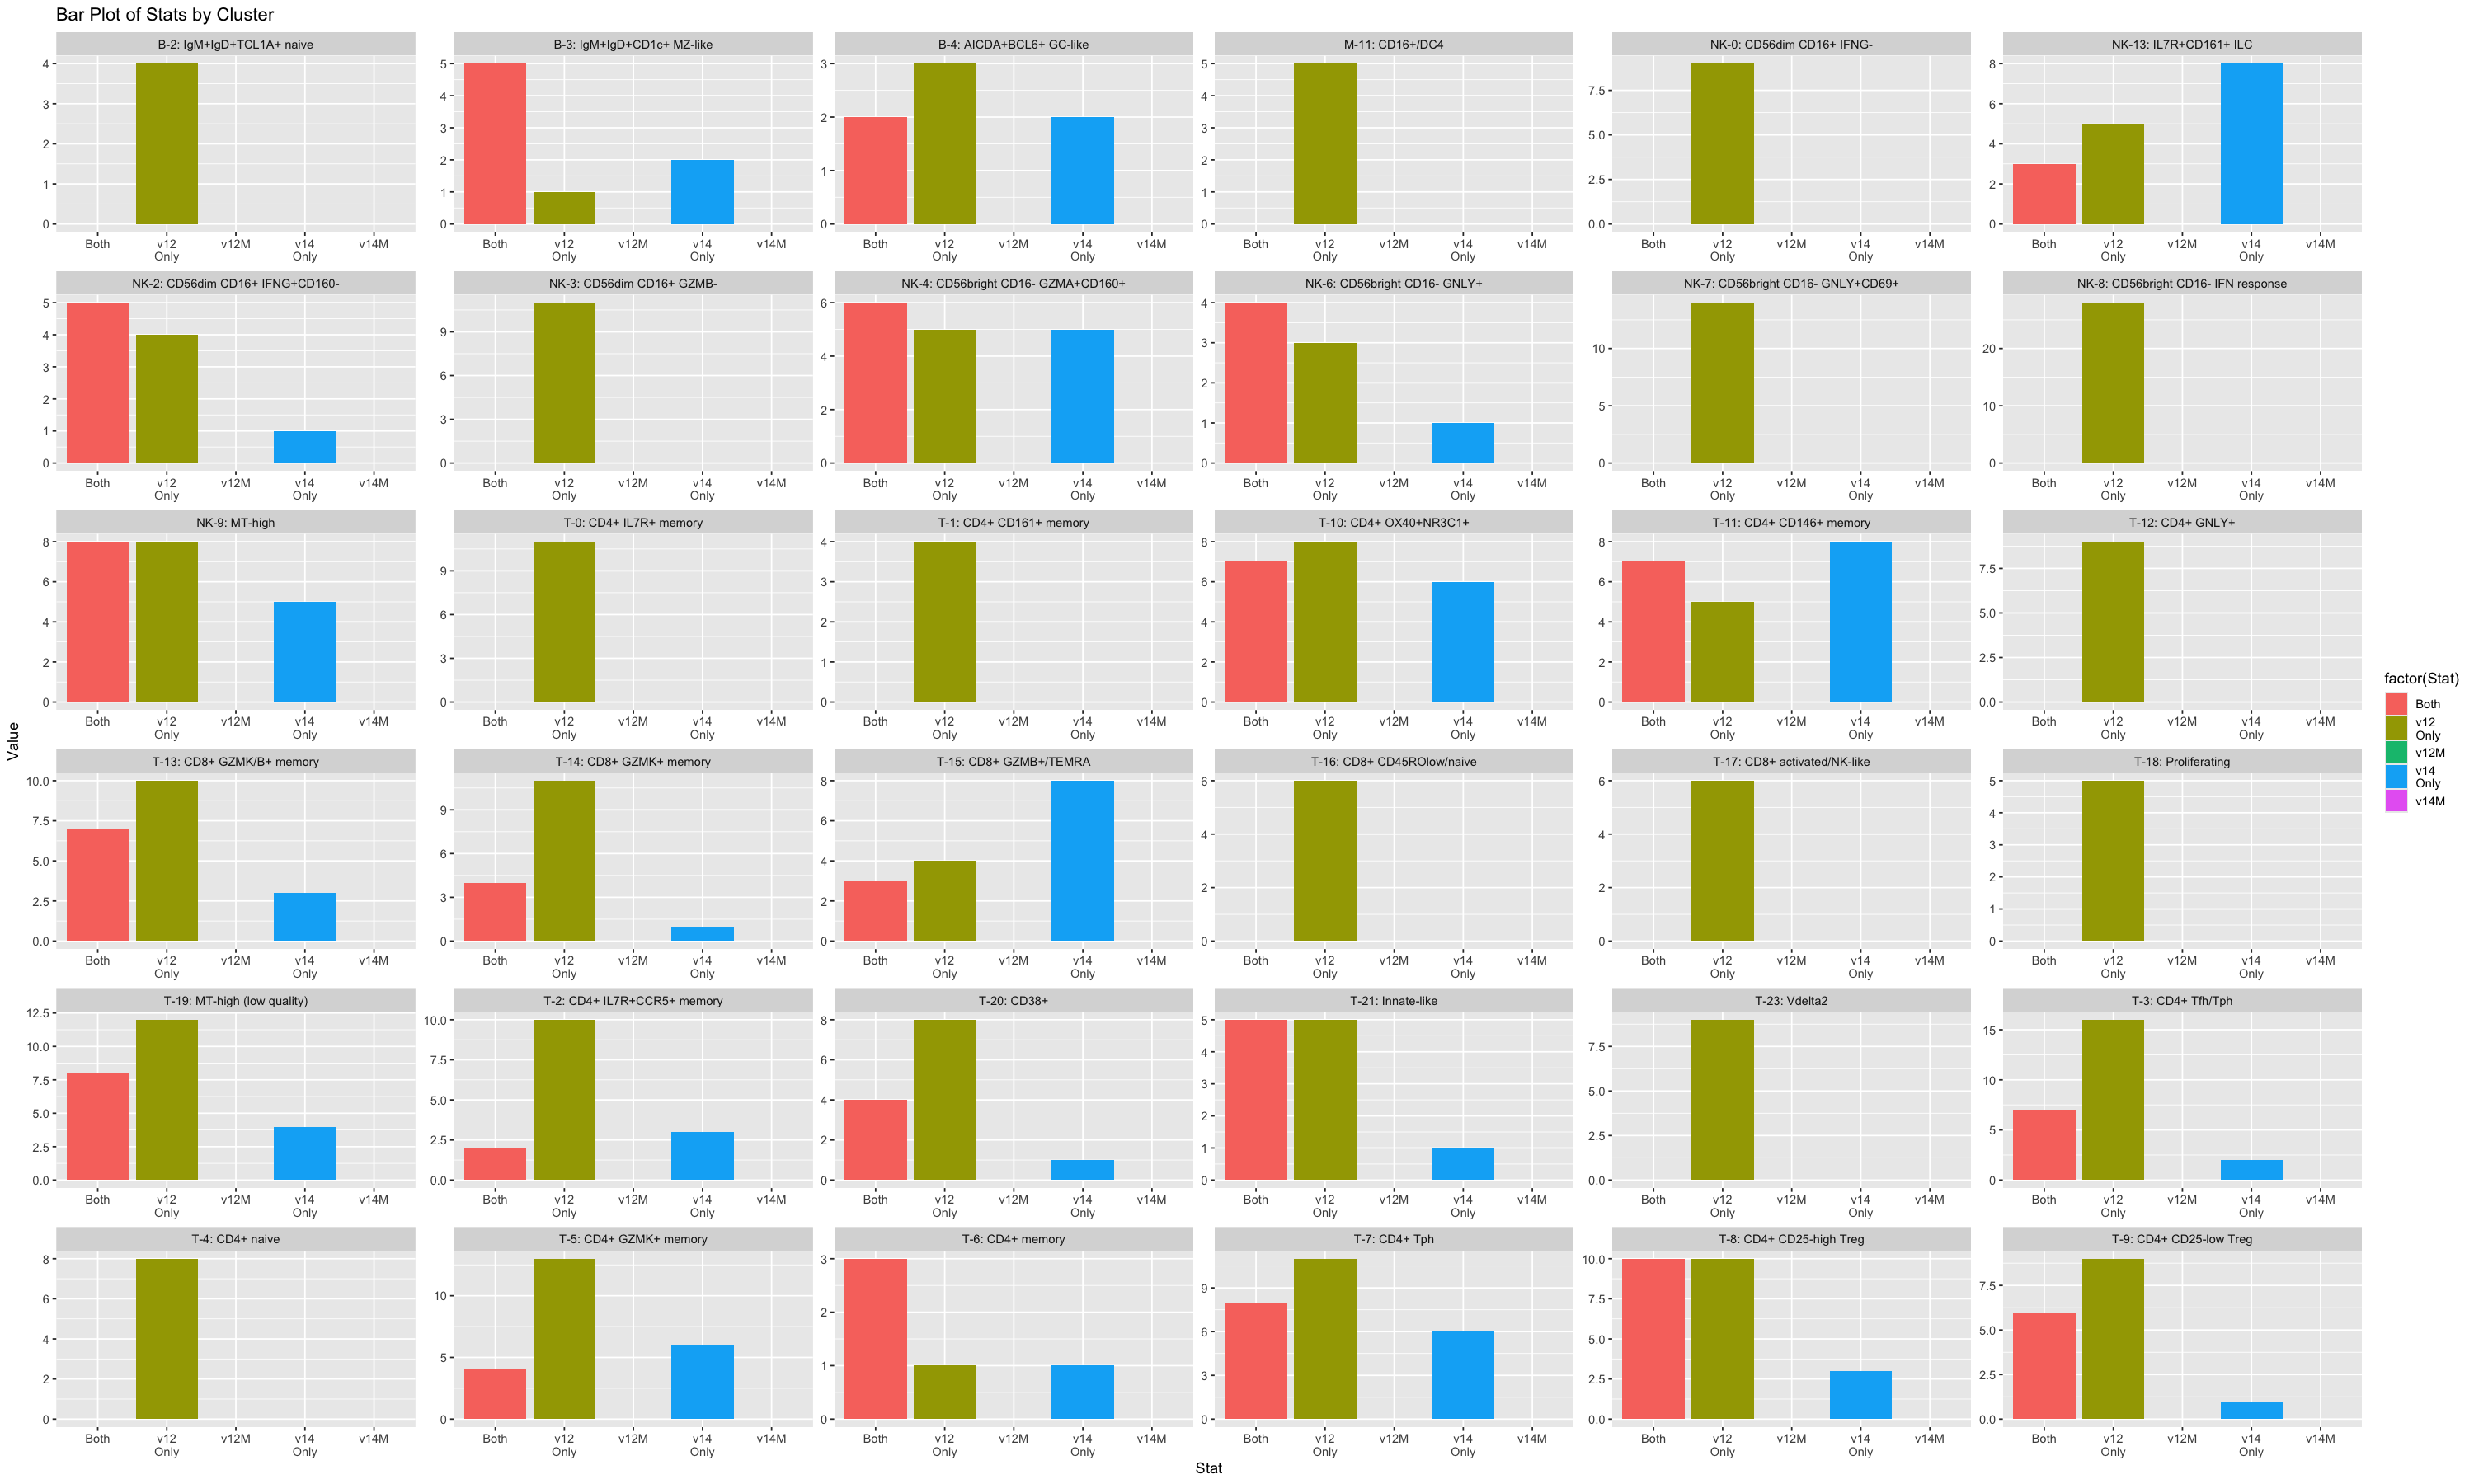

In [172]:

# Create the bar plot
ggplot(gene_comp_df[gene_comp_df$Stat %in% c("Both", "v14\nOnly", "v12\nOnly", "v14M", "v12M"),], 
       aes(x = Stat, y = Value, fill = factor(Stat))) +  # Fill color by 'Stat'
  geom_bar(stat = "identity", position = "dodge") +  # Bar plot with 'identity' for the 'Value' column
  facet_wrap(~ Cluster, scales = "free") +         # Create separate plots for each 'Cluster'
  labs(title = "Bar Plot of Stats by Cluster",
       x = "Stat",
       y = "Value")    

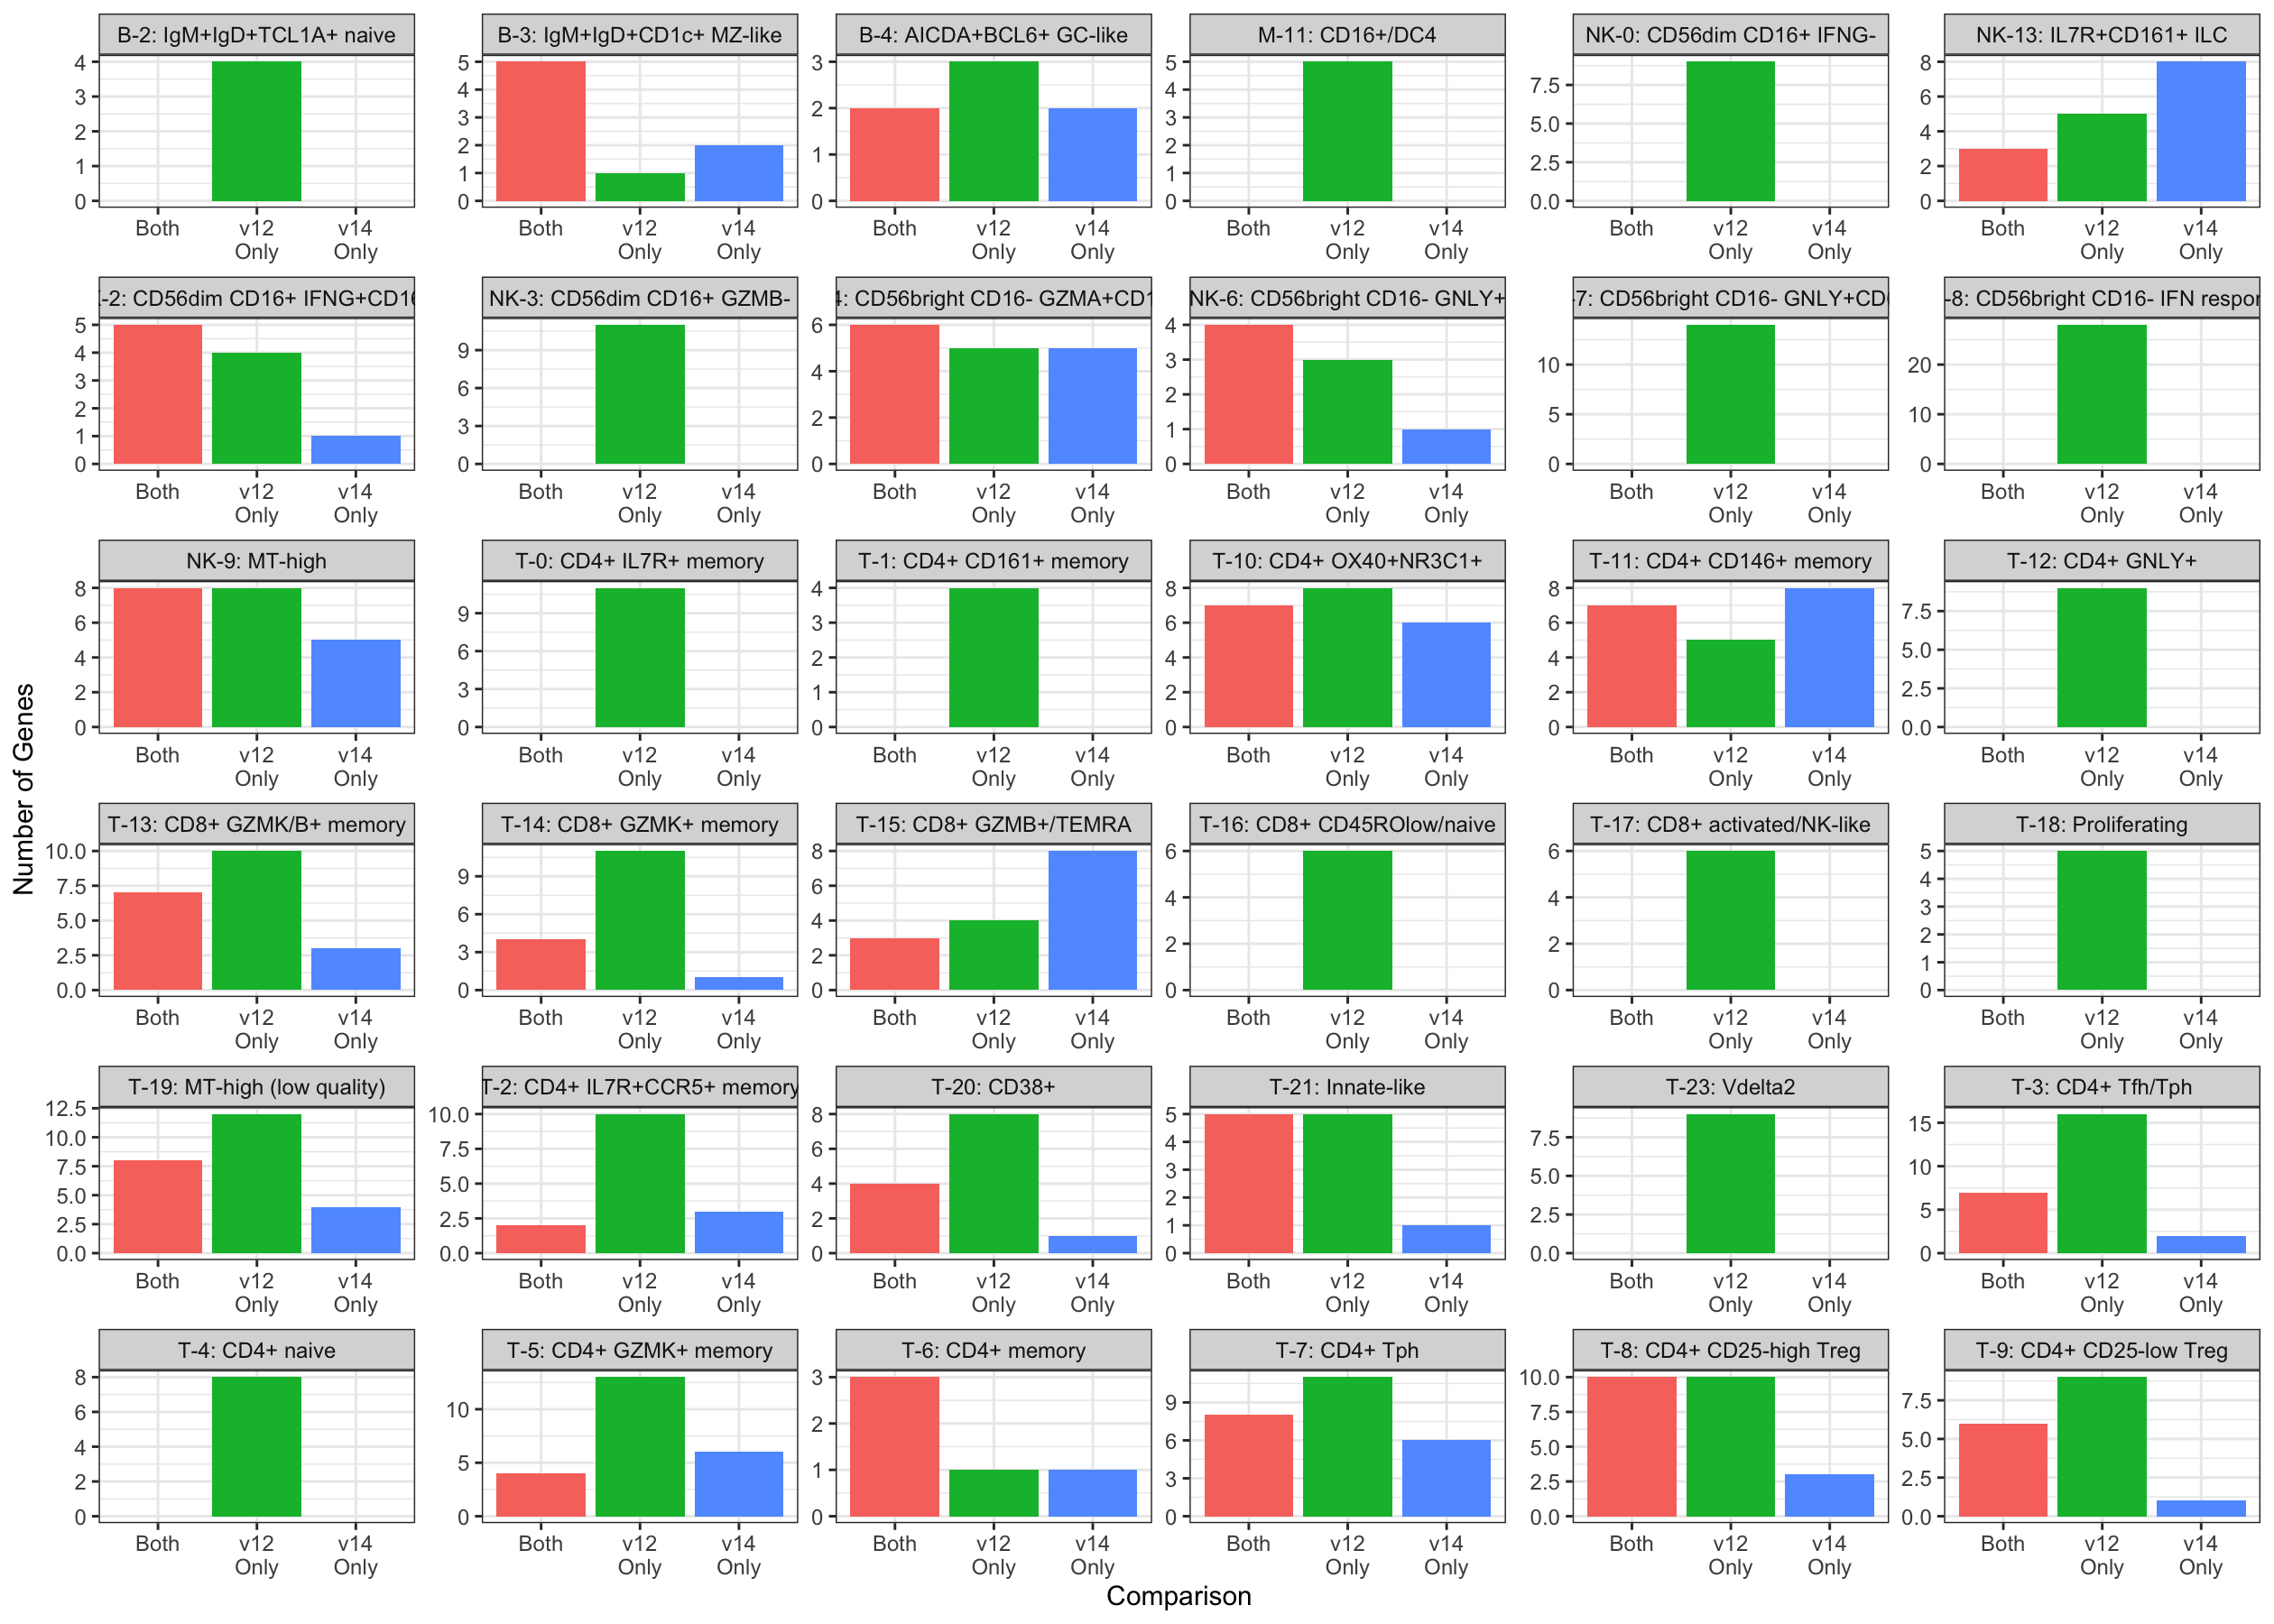

In [178]:
options(repr.plot.height=15, repr.plot.width=21)
# Create the bar plot
ggplot(gene_comp_df[gene_comp_df$Stat %in% c("Both", "v14\nOnly", "v12\nOnly"),], 
       aes(x = Stat, y = Value, fill = factor(Stat))) +  # Fill color by 'Stat'
  geom_bar(stat = "identity", position = "dodge") +  # Bar plot with 'identity' for the 'Value' column
  facet_wrap(~ Cluster, scales = "free") +         # Create separate plots for each 'Cluster'
  labs(
       x = "Comparison",
       y = "Number of Genes", fill="Comparison")    + theme_bw(base_size=18) + theme(legend.position="None")

In [179]:
ggsave("./scGWAS_Path_GeneComp.png", dpi=300, width=21, height=15)